## Visão Geral
Com base na Pesquisa de Informações Básicas Municipais de 2021, conduziu-se uma análise exploratória para traçar o perfil das prefeituras brasileiras quanto à representação de mulheres em cargos públicos. Examinou-se diferentes setores, incluindo cultura, esporte, educação, saúde e informações sobre prefeitos(as), a fim de obter uma visão abrangente da desigualdade de gênero nas esferas municipais.

## O conjunto de dados
Segundo o IBGE, MUNIC é um levantamento detalhado de registros administrativos sobre a estrutura, a dinâmica e o funcionamento das instituições públicas municipais, em especial a prefeitura. 

Os dados utilizados neste estudo foram obtidos a partir do levantamento realizado em 2021: 
https://www.ibge.gov.br/estatisticas/sociais/protecao-social/10586-pesquisa-de-informacoes-basicas-municipais.html

## Dicionário dos dados
|Nome         |Descrição                     
| :---        | :--- 
|CodMun	      | ID do município
|UF	          | Unidade Federativa
|Municipio	  | Nome do município
|Faixa_pop    | Faixa populacional 
|Pop          | População estimada em 2021
|Regiao	      | Região do município
|Mandato 2020 | Estava em exercício do mandato de prefeito(a) neste município em 2020	
|Sexo	      | Sexo do(a) titular do órgão gestor			
|Idade	      | Idade do(a) titular do órgão gestor
|Raça	      | Cor/raça do(a) titular do órgão gestor
|Autodeclara  |	Foi respondido pelo próprio titular do órgão gestor
|Escolaridade | Escolaridade do(a) titular do órgão gestor

## Importando conjunto de dados

In [6]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

In [7]:
# Importando dados
data = pd.ExcelFile("Base_MUNIC_2021.xlsx")

In [8]:
# Nome das tabelas
data.sheet_names

['Dicionário',
 'Informações atual prefeito',
 'Recursos humanos',
 'Legislação e instr de planej',
 'Educação',
 'Cultura',
 'Esporte',
 'Saúde',
 'COVID',
 'Variáveis externas']

## Análise preliminar conduzida no Microsoft Excel

Antes de prosseguir com a análise, foi conduzida uma avaliação preliminar no Microsoft Excel. Essa etapa foi fundamental para identificar os dados essenciais à consecução dos objetivos do projeto. Subsequentemente, realizou-se uma depuração dos dados, visando aprimorar a eficácia das análises a serem realizadas. 

Como resultado desse processo, criou-se um conjunto de dados atualizado, alinhado com os propósitos da análise. Nesse contexto, foram eliminadas as planilhas "Dicionário", "Recursos Humanos", "Legislação e Instruções de Planejamento", "COVID" e "Variáveis Externas", uma vez que não se relacionavam com os objetivos estabelecidos.

Além disso, realizou-se a exclusão de algumas colunas das planilhas que serão utilizadas, visto que essas colunas não continham dados.

In [9]:
# Importando dados formatados
df = pd.ExcelFile("Base_MUNIC_2021 - Atualizada.xlsx")

In [10]:
# Nome das tabelas atuais
df_planilhas = df.sheet_names
df_planilhas

['Informações atual prefeito', 'Educação', 'Cultura', 'Esporte', 'Saúde']

In [11]:
# Importando cada planilha separadamente
df_pre = pd.read_excel(df, sheet_name=df_planilhas[0]) # Informações atuais do prefeito
df_edu = pd.read_excel(df, sheet_name=df_planilhas[1]) # Educação
df_cul = pd.read_excel(df, sheet_name=df_planilhas[2]) # Cultura
df_esp = pd.read_excel(df, sheet_name=df_planilhas[3]) # Esporte
df_sau = pd.read_excel(df, sheet_name=df_planilhas[4]) # Saúde

## Função para gerar frequências relativas ao longo do estudo

In [12]:
# Função para calcular frequência relativa
def freq_rel(coluna):
    contagem = np.sum(coluna)
    calc = round((coluna / contagem) * 100, 2)
    return calc

## Dados sobre "Informações atuais prefeitos"

#### Tratamento dados sobre informações atuais do prefeito

In [ ]:
# Imprimindo as 5 primeiras linhas
df_pre.head()

#### Alterar nome das colunas

In [14]:
# Alterando nome das colunas
dicionario_pre = df_pre.rename (columns={ 'Mun': 'Municipio',
                  'Mpeg02': 'Mandato 2020',
                  'Mpeg03': 'Sexo',
                  'Mpeg04': 'Idade',
                  'Mpeg05': 'Raça',
                  'Mpeg051': 'Autodeclara',
                  'Mpeg06': 'Escolaridade',
                  'Pop estimada 2021': 'Pop'                      
}, inplace=True)

In [15]:
# Alterando valores da variável 'Regiao'
mapeamento_pre = {
    '1 - Norte': 'Norte',
    '2 - Nordeste': 'Nordeste',
    '3 - Sudeste': 'Sudeste',
    '4 - Sul': 'Sul',
    '5 - Centro-Oeste': 'Centro-Oeste',
}
df_pre['Regiao'] = df_pre['Regiao'].replace(mapeamento_pre)

In [16]:
df_pre.head()

,CodMun,UF,Municipio,Pop,Faixa_pop,Regiao,Mandato 2020,Sexo,Idade,Raça,Autodeclara,Escolaridade
0,1100015,RO,Alta Floresta DOeste,22516,4 - 20001 até 50000,Norte,Nao,Masculino,40,Branca,Sim,Especialização
1,1100023,RO,Ariquemes,111148,6 - 100001 até 500000,Norte,Nao,Feminino,33,Branca,Sim,Ensino superior completo
2,1100031,RO,Cabixi,5067,2 - 5001 até 10000,Norte,Sim,Masculino,50,Parda,Nao,Ensino superior completo
3,1100049,RO,Cacoal,86416,5 - 50001 até 100000,Norte,Nao,Masculino,35,Parda,Sim,Ensino superior completo
4,1100056,RO,Cerejeiras,16088,3 - 10001 até 20000,Norte,Sim,Feminino,57,Branca,Nao,Ensino superior completo


#### Qual quantidade de prefeitos masculinos e femininos?

In [17]:
# Separando os sexos
pre_fem =  pd.DataFrame(df_pre[df_pre['Sexo'] == 'Feminino'])
pre_mas =  pd.DataFrame(df_pre[df_pre['Sexo'] == 'Masculino'])

In [18]:
# Contando quantos prefeitos por sexo
contagem_pre_fem = len(pre_fem)
contagem_pre_mas = len(pre_mas)

# Imprime o valor de contagem_pre_fem
print(f"Prefeituras femininas: {contagem_pre_fem}")

# Imprime o valor de contagem_pre_mas
print(f"Prefeituras masculinas: {contagem_pre_mas}")

Prefeituras femininas: 674
Prefeituras masculinas: 4894


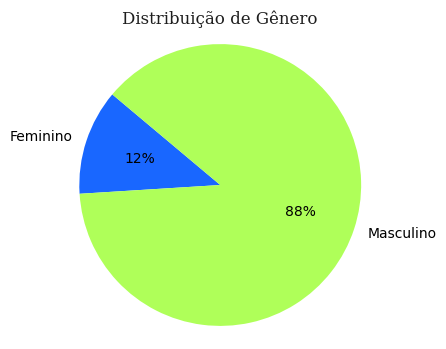

In [19]:
# valores_pre e rótulos para o gráfico
valores_pre = [contagem_pre_fem, contagem_pre_mas]
rotulos_pre = ['Feminino', 'Masculino']

# Definindo as cores personalizadas
cores = ['#1967FF', '#AFFF59']  

# Definindo o estilo da fonte
fonte = {'family': 'serif', 'color': '#1E1E1E', 'weight': 'normal', 'size': 12}

# Criando o gráfico de pizza com cores e fonte personalizadas
plt.figure(figsize=(4, 4))
plt.pie(valores_pre, labels=rotulos_pre, autopct='%1.0f%%', startangle=140, colors=cores)
plt.title('Distribuição de Gênero', fontdict=fonte)
plt.axis('equal')  

plt.show()

Em 2021, 12% das prefeituras do Brasil eram ocupadas por mulheres, enquanto 88% eram ocupadas por homens. No ano seguinte, a demografia do país indicou que mais de 51% da população era composta por mulheres.

#### Em quais estados e regiões se concentra a maior quantidade de prefeitas?

In [20]:
# Agrupando por estados
uf_pre = pre_fem.groupby('UF').size().reset_index(name='Frequência acumulada')
uf_pre['Frequência relativa'] = freq_rel(uf_pre['Frequência acumulada'])
uf_pre = uf_pre.rename(columns={'UF': 'Estados'})
uf_pre = uf_pre.sort_values(by='Frequência acumulada', ascending=False)
uf_pre 

,Estados,Frequência acumulada,Frequência relativa
9,MG,63,9.35
24,SP,60,8.90
4,BA,54,8.01
8,MA,48,7.12
16,PR,39,5.79
18,RN,38,5.64
13,PB,37,5.49
21,RS,37,5.49
7,GO,36,5.34
14,PE,35,5.19


In [21]:
# Dados
estados_pre = uf_pre['estados_pre']
frequencia_acumulada_uf_pre = uf_pre['Frequência relativa']

# Cores das barras
cores = ['#1967FF']

# Criação do gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(estados_pre, frequencia_acumulada_uf_pre, color=cores)
plt.xlabel('Frequência Relativa (%)')
plt.ylabel('estados_pre')
plt.title('Frequência Relativa por Estado')

# Personalização das fontes e limites do eixo y
plt.xticks(fontsize=12)
plt.yticks(fontsize=10) 
plt.title('Distribuição da Representação Feminina por Estado', fontsize=14)
plt.xlabel('Frequência Relativa', fontsize=12)
plt.ylabel('estados_pre', fontsize=12)

# Adicionando rótulos às barras
for i, v in enumerate(frequencia_acumulada_uf_pre):
    plt.text(v + 0.0, i, f'{v:.2f}%', va='center', fontsize=9)

# Definindo limites do eixo y para ajustar o tamanho dos nomes
plt.gca().invert_yaxis()  # Inverte a ordem dos estados_pre

plt.show()

KeyError: 'estados_pre'

#### Região que possui mais mulheres prefeitas

In [ ]:
# Agrupando por região
rg_pre = pre_fem.groupby('Regiao')['Regiao'].count().reset_index(name='Frequência acumulada')
rg_pre['Frequência relativa'] = freq_rel(rg_pre['Frequência acumulada'])
rg_pre = rg_pre.sort_values(by='Frequência relativa', ascending=False)
rg_pre

,Regiao,Frequência acumulada,Frequência relativa
1,Nordeste,309,45.85
3,Sudeste,135,20.03
4,Sul,103,15.28
2,Norte,71,10.53
0,Centro-Oeste,56,8.31


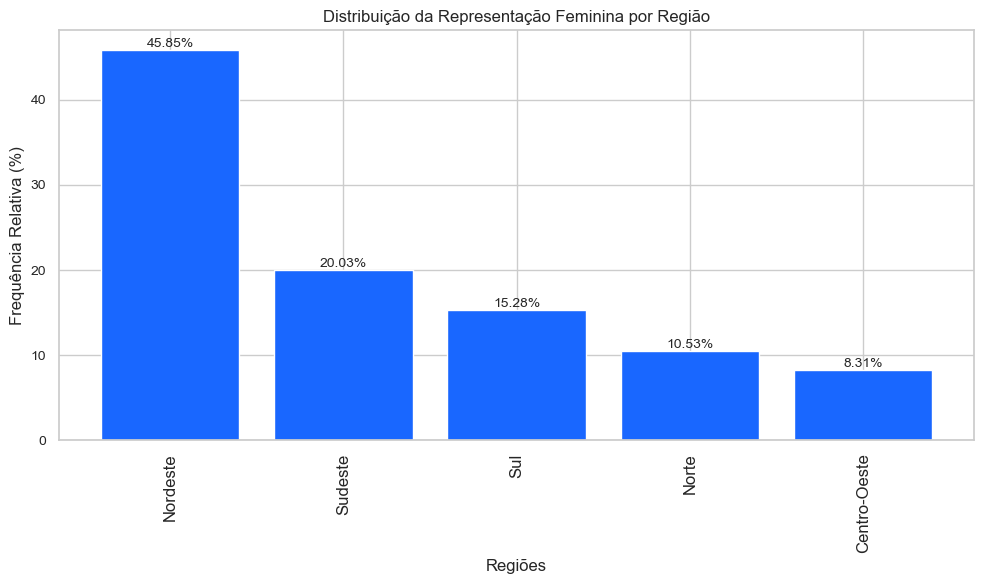

In [ ]:
# Dados
regioes_pre = rg_pre['Regiao']
frequencia_relativa_rg_pre = rg_pre['Frequência relativa']

cores = ['#1967FF']

# Criar o histograma
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=10) 
bars = plt.bar(regioes_pre, frequencia_relativa_rg_pre, color=cores)
plt.xlabel('Regiões')
plt.ylabel('Frequência Relativa (%)')
plt.title('Distribuição da Representação Feminina por Região')
plt.xticks(rotation=90)  # Rotacionar rótulos do eixo x para melhor legibilidade

# Adicionar rótulos às barras
for bar, label in zip(bars, frequencia_relativa_rg_pre):
    plt.text(bar.get_x() + bar.get_width() / 2, label, f'{label:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Exibir o histograma
plt.show()

Embora um percentual de 9,36% das prefeitas estivesse concentrado no estado de Minas Gerais, a maioria, correspondendo a 45,77%, estava distribuída pelas cidades do Nordeste. No entanto, as regiões Norte e Centro-Oeste, apresentavam as menores taxas de representação feminina na liderança das prefeituras, somando apenas 18,87%.

#### Qual a classificação de raça/cor predominante das prefeitas?

In [ ]:
# Agrupando raça/cor
pre_fem['Raça'].value_counts()

Branca      461
Parda       200
Preta         9
Amarela       3
Indígena      1
Name: Raça, dtype: int64

##### Quantos falaram "sim" para a classificassão racial?

In [ ]:
# Agrupando autodeclaradas
pre_fem[pre_fem['Autodeclara'] == 'Sim'].groupby('Raça').size().reset_index(name='Contagem').sort_values(by='Contagem', ascending=False)

,Raça,Contagem
1,Branca,96
2,Parda,40
0,Amarela,3
3,Preta,1


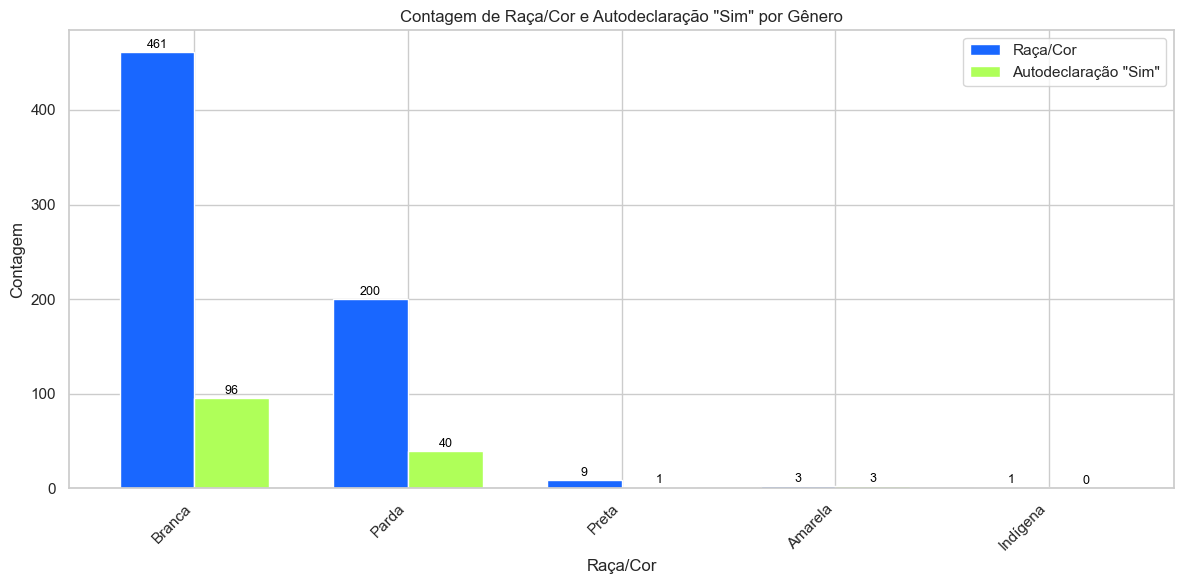

In [ ]:
# Dados de contagem de raça/cor
contagem_raca_cor_pre = pre_fem['Raça'].value_counts().reset_index()
contagem_raca_cor_pre.columns = ['Raça/Cor', 'Contagem']

# Dados de autodeclarações "Sim" por raça/cor
autodeclara_sim_pre = pre_fem[pre_fem['Autodeclara'] == 'Sim']
contagem_autodeclara_sim_pre = autodeclara_sim_pre['Raça'].value_counts().reset_index()
contagem_autodeclara_sim_pre.columns = ['Raça/Cor', 'Contagem']

# Combinar os dados preenchendo com 0 quando ausente
contagem_combinada_pre = pd.merge(contagem_raca_cor_pre, contagem_autodeclara_sim_pre, on='Raça/Cor', how='outer').fillna(0)

# Configurar subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Cores para as barras
cores = ['#1967FF', '#AFFF59']

# Posições no eixo x para as barras
posicoes = np.arange(len(contagem_combinada_pre))

# Largura das barras
largura_barra = 0.35

# Gráfico de barras para raça/cor
ax.bar(posicoes - largura_barra/2, contagem_combinada_pre['Contagem_x'], largura_barra, label='Raça/Cor', color=cores[0])

# Gráfico de barras para autodeclarações "Sim"
ax.bar(posicoes + largura_barra/2, contagem_combinada_pre['Contagem_y'], largura_barra, label='Autodeclaração "Sim"', color=cores[1])

# Configurações do gráfico
ax.set_xlabel('Raça/Cor')
ax.set_ylabel('Contagem')
ax.set_title('Contagem de Raça/Cor e Autodeclaração "Sim" por Gênero')
ax.set_xticks(posicoes)
ax.set_xticklabels(contagem_combinada_pre['Raça/Cor'], rotation=45, ha='right')
ax.legend()

# Adicionando rótulos às barras
for i in range(len(posicoes)):
    plt.text(posicoes[i] - largura_barra/2, contagem_combinada_pre['Contagem_x'][i] + 1, 
             int(contagem_combinada_pre['Contagem_x'][i]), ha='center', va='bottom', color='black', fontsize=9)
    plt.text(posicoes[i] + largura_barra/2, contagem_combinada_pre['Contagem_y'][i] + 1, 
             int(contagem_combinada_pre['Contagem_y'][i]), ha='center', va='bottom', color='black', fontsize=9)

plt.tight_layout()
plt.show()

O número de prefeitas brancas é significativamente maior em comparação com as outras raça/cor, tanto na classificação quanto na autodeclaração. A raça/cor com a menor representação entre as prefeitas é a indígena, com apenas uma prefeita na classificação. Na classificação, não há prefeitas amarelas autodeclaradas, e apenas uma prefeita autodeclarada como preta.

#### Perfil educacional das prefeitas

In [ ]:
# Frequência acumulada das escolaridade_pre_fems - Feminino
escolaridade_pre_fem = pre_fem.groupby('Escolaridade')['Escolaridade'].count().reset_index(name='Frequência acumulada')
escolaridade_pre_fem['Frequência relativa'] = freq_rel(escolaridade_pre_fem['Frequência acumulada'])
escolaridade_pre_fem = escolaridade_pre_fem
escolaridade_pre_fem

,Escolaridade,Frequência acumulada,Frequência relativa
0,Doutorado,12,1.78
1,Ensino fundamental ( 1º Grau) completo,3,0.45
2,Ensino fundamental (1º Grau) incompleto,2,0.30
3,Ensino médio (2º Grau) completo,87,12.91
4,Ensino médio (2º Grau) incompleto,2,0.30
5,Ensino superior completo,365,54.15
6,Ensino superior incompleto,45,6.68
7,Especialização,140,20.77
8,Mestrado,18,2.67


In [ ]:
# Frequência acumulada das escolaridades - Masculino
escolaridade_pre_mas = pre_mas.groupby('Escolaridade')['Escolaridade'].count().reset_index(name='Frequência acumulada')
escolaridade_pre_mas['Frequência relativa'] = freq_rel(escolaridade_pre_mas['Frequência acumulada'])
escolaridade_pre_mas = escolaridade_pre_mas
escolaridade_pre_mas

,Escolaridade,Frequência acumulada,Frequência relativa
0,Doutorado,54,1.10
1,Ensino fundamental ( 1º Grau) completo,228,4.66
2,Ensino fundamental (1º Grau) incompleto,261,5.33
3,Ensino médio (2º Grau) completo,1231,25.15
4,Ensino médio (2º Grau) incompleto,130,2.66
5,Ensino superior completo,1991,40.68
6,Ensino superior incompleto,355,7.25
7,Especialização,554,11.32
8,Mestrado,90,1.84


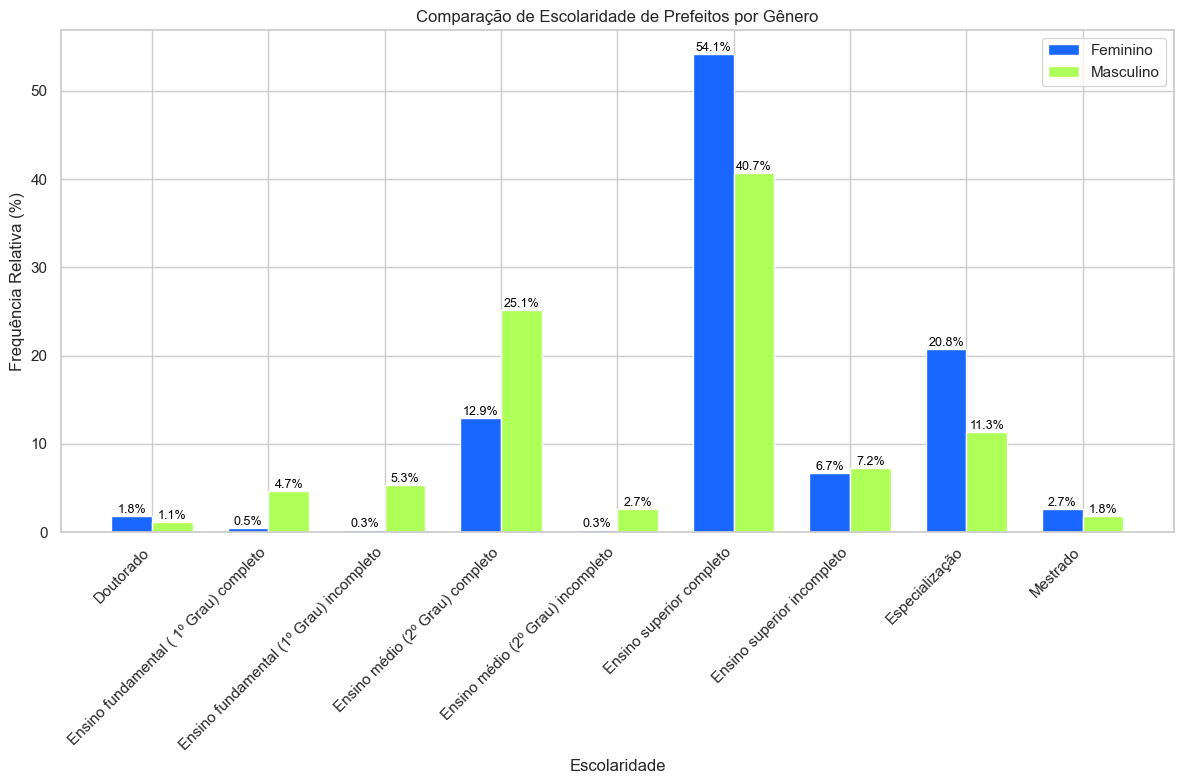

In [ ]:
# Dados de frequência relativa de escolaridade - Feminino
escolaridade_pre_fem_freqrel = escolaridade_pre_fem['Frequência relativa']

# Dados de frequência relativa de escolaridade - Masculino
escolaridade_pre_mas_freqrel = escolaridade_pre_mas['Frequência relativa']

# Dados
lista_escolaridade = escolaridade_pre_fem['Escolaridade'].unique().tolist()

# Posições no eixo x para as barras
posicoes = np.arange(len(lista_escolaridade))

# Largura das barras
largura_barra = 0.35

# Criação do gráfico de barras lado a lado
fig, ax = plt.subplots(figsize=(12, 8))

# Cores personalizadas para feminino e masculino
cores_feminino = '#1967FF'
cores_masculino = '#AFFF59'

# Gráfico de barras para o feminino
bar1 = ax.bar(posicoes - largura_barra/2, escolaridade_pre_fem_freqrel, largura_barra, label='Feminino', color=cores_feminino)

# Gráfico de barras para o masculino
bar2 = ax.bar(posicoes + largura_barra/2, escolaridade_pre_mas_freqrel, largura_barra, label='Masculino', color=cores_masculino)

# Configurações do gráfico
ax.set_xlabel('Escolaridade')
ax.set_ylabel('Frequência Relativa (%)')
ax.set_title('Comparação de Escolaridade de Prefeitos por Gênero')
ax.set_xticks(posicoes)
ax.set_xticklabels(lista_escolaridade, rotation=45, ha='right')
ax.legend()

# Adicionando rótulos às barras
for i in range(len(posicoes)):
    plt.text(posicoes[i] - largura_barra/2, escolaridade_pre_fem_freqrel[i] + 0.0, 
             f"{escolaridade_pre_fem_freqrel[i]:.1f}%", ha='center', va='bottom', color='black', fontsize=9)
    plt.text(posicoes[i] + largura_barra/2, escolaridade_pre_mas_freqrel[i] + 0.0, 
             f"{escolaridade_pre_mas_freqrel[i]:.1f}%", ha='center', va='bottom', color='black', fontsize=9)

plt.tight_layout()
plt.show()

Entre as prefeitas mulheres, 54,23% possuíam ensino superior completo, e cerca de 20,80% delas tinham especialização, o que indica que estavam buscando educação continuada e aprimoramento profissional. Enquanto que entre os prefeitos homens, 40,68% tinham ensino superior completo, uma porcentagem ligeiramente menor do que a das prefeitas mulheres. O segundo grupo mais significativo de prefeitos homens (25,15%) possuía ensino médio completo.

## Dados sobre o setor de educação

#### Alterando o nome das colunas

In [ ]:
# Alterando nome das colunas
dicionario_edu = df_edu.rename (columns={ 'Mun': 'Municipio',
                  'Medu01': 'Orgao Gestor',
                  'Medu03': 'Sexo',
                  'Medu04': 'Idade',
                  'Medu05': 'Raça',
                  'Medu051': 'Autodeclara',
                  'Medu06': 'Escolaridade'
}, inplace=True)

In [ ]:
# Alterando valores da coluna 'Regiao'
mapeamento_edu = {
    '1 - Norte': 'Norte',
    '2 - Nordeste': 'Nordeste',
    '3 - Sudeste': 'Sudeste',
    '4 - Sul': 'Sul',
    '5 - Centro-Oeste': 'Centro-Oeste',
}
df_edu['Regiao'] = df_edu['Regiao'].replace(mapeamento_edu)

In [ ]:
df_edu.head()

,CodMun,UF,Municipio,Pop,Faixa_pop,Regiao,Orgao Gestor,Sexo,Idade,Raça,Autodeclara,Escolaridade
0,1100015,RO,Alta Floresta DOeste,22516,4 - 20001 até 50000,Norte,Secretaria exclusiva,Masculino,60,Parda,Sim,Especialização
1,1100023,RO,Ariquemes,111148,6 - 100001 até 500000,Norte,Secretaria exclusiva,Feminino,56,Parda,Sim,Especialização
2,1100031,RO,Cabixi,5067,2 - 5001 até 10000,Norte,Secretaria em conjunto com outras políticas se...,Feminino,51,Parda,Sim,Ensino superior completo
3,1100049,RO,Cacoal,86416,5 - 50001 até 100000,Norte,Secretaria exclusiva,Masculino,48,Parda,Sim,Especialização
4,1100056,RO,Cerejeiras,16088,3 - 10001 até 20000,Norte,Secretaria em conjunto com outras políticas se...,Feminino,57,Parda,Sim,Especialização


#### Diferença entre homens e mulheres no setor de Educação

In [ ]:
# Separando os sexos
edu_fem = pd.DataFrame(df_edu[df_edu['Sexo'] == 'Feminino'])
edu_mas = pd.DataFrame(df_edu[df_edu['Sexo'] == 'Masculino'])

In [ ]:
# Contagem
contagem_edu_fem = len(edu_fem)
contagem_edu_mas = len(edu_mas)

# Imprime o valor de contagem_edu_fem
print(f"Feminino: {contagem_edu_fem}")

# Imprime o valor de contagem_edu_mas
print(f"Masculino: {contagem_edu_mas}")

Feminino: 3881
Masculino: 1686


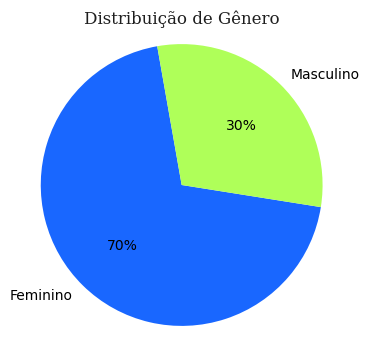

In [ ]:
# valores_edu e rótulos para o gráfico
valores_edu = [contagem_edu_fem, contagem_edu_mas]
rotulos_edu = ['Feminino', 'Masculino']

# Definindo as cores personalizadas
cores = ['#1967FF', '#AFFF59']  

# Definindo o estilo da fonte
fonte = {'family': 'serif', 'color': '#1E1E1E', 'weight': 'normal', 'size': 12}

# Criando o gráfico de pizza com cores e fonte personalizadas
plt.figure(figsize=(4, 4))
plt.pie(valores_edu, labels=rotulos_edu, autopct='%1.0f%%', startangle=100, colors=cores)
plt.title('Distribuição de Gênero', fontdict=fonte)
plt.axis('equal')  # Mantém o aspecto igual para evitar distorções

plt.show()

No setor da educação, cerca de 70% dos cargos eram ocupados por mulheres, destacando a significativa representação feminina nessa área.

#### Qual a distribuição geográfica no setor da educação municipal?

In [ ]:
# Agrupando o estados
uf_edu = edu_fem.groupby('UF').size().reset_index(name='Frequência acumulada')
uf_edu['Frequência relativa'] = freq_rel(uf_edu['Frequência acumulada'])
uf_edu = uf_edu.sort_values(by='Frequência relativa', ascending=False)
uf_edu

,UF,Frequência acumulada,Frequência relativa
10,MG,690,17.78
25,SP,393,10.13
22,RS,383,9.87
17,PR,332,8.55
4,BA,271,6.98
23,SC,220,5.67
8,GO,174,4.48
14,PB,161,4.15
16,PI,149,3.84
9,MA,138,3.56


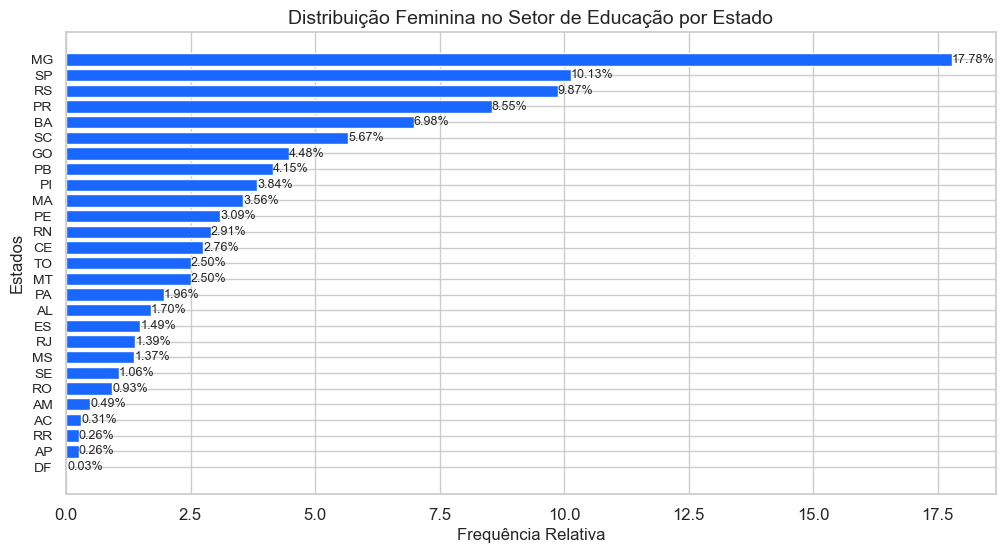

In [ ]:
# Dados
estados_edu = uf_edu['UF']
frequencia_acumulada_uf_edu = uf_edu['Frequência relativa']

# Cores das barras
cores = ['#1967FF']

# Criação do gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(estados_edu, frequencia_acumulada_uf_edu, color=cores)
plt.xlabel('Frequência Relativa (%)')
plt.ylabel('Estados')
plt.title('Frequência Relativa por Estado')

# Personalização das fontes e limites do eixo y
plt.xticks(fontsize=12)
plt.yticks(fontsize=10) 
plt.title('Distribuição Feminina no Setor de Educação por Estado', fontsize=14)
plt.xlabel('Frequência Relativa', fontsize=12)
plt.ylabel('Estados', fontsize=12)

# Adicionando rótulos às barras
for i, v in enumerate(frequencia_acumulada_uf_edu):
    plt.text(v + 0.0, i, f'{v:.2f}%', va='center', fontsize=9)

# Definindo limites do eixo y para ajustar o tamcanho dos nomes
plt.gca().invert_yaxis()  # Inverte a ordem dos estados_edu

plt.show()

In [ ]:
# Agrupando o regiões
rg_edu = edu_fem.groupby('Regiao').size().reset_index(name='Frequência acumulada')
rg_edu['Frequência relativa'] = freq_rel(rg_edu['Frequência acumulada'])
rg_edu = rg_edu.sort_values(by='Frequência relativa', ascending=False)
rg_edu

,Regiao,Frequência acumulada,Frequência relativa
3,Sudeste,1195,30.79
1,Nordeste,1166,30.04
4,Sul,935,24.09
0,Centro-Oeste,325,8.37
2,Norte,260,6.70


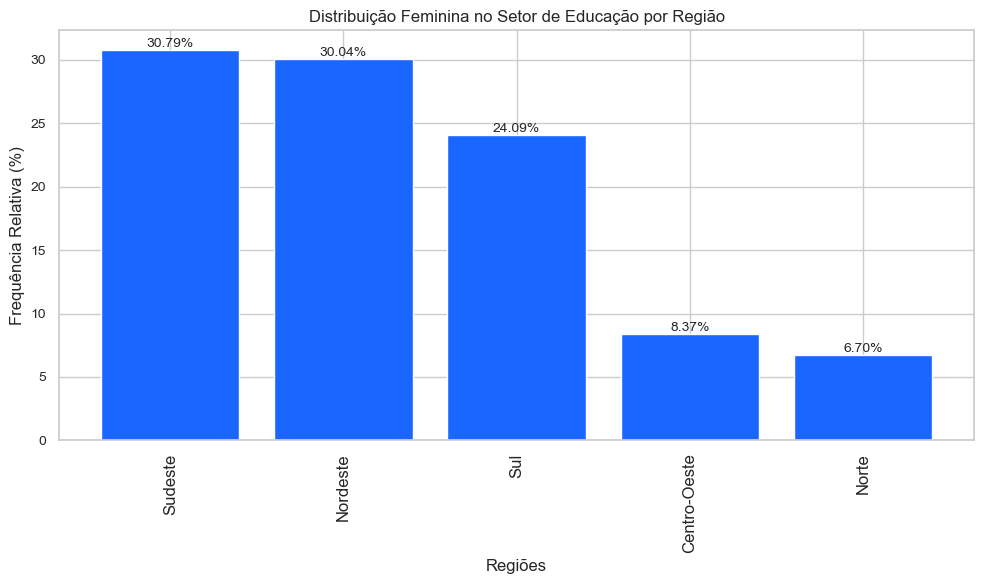

In [ ]:
# Dados
regioes_edu = rg_edu['Regiao']
frequencia_relativa_rg_edu = rg_edu['Frequência relativa']

cores = ['#1967FF']

# Criar o histograma
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=10) 
bars = plt.bar(regioes_edu, frequencia_relativa_rg_edu, color=cores)
plt.xlabel('Regiões')
plt.ylabel('Frequência Relativa (%)')
plt.title('Distribuição Feminina no Setor de Educação por Região')
plt.xticks(rotation=90)  # Rotacionar rótulos do eixo x para melhor legibilidade

# Adicionar rótulos às barras
for bar, label in zip(bars, frequencia_relativa_rg_edu):
    plt.text(bar.get_x() + bar.get_width() / 2, label, f'{label:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Exibir o histograma
plt.show()

A distribuição geográfica também nos apresenta um cenário interessante. A maioria expressiva, correspondendo a 17,78%, encontrava-se concentrada no estado de Minas Gerais.

Quando analisado por região, observa-se que o Sudeste liderava em representação feminina neste setor, porém, é igualmente notável que o Nordeste mantém taxas significativas, atingindo 30,04%, seguindo logo abaixo do Sudeste com 30,79%.

#### Apesar das mulheres serem maioria, há diferença significativa entre os cargos?

In [ ]:
# Agrupando orgão gestor por sexo feminino
og_edu_fem = edu_fem.groupby('Orgao Gestor').size().reset_index(name='Frequência acumulada')
og_edu_fem['Frequência relativa'] = freq_rel(og_edu_fem['Frequência acumulada'])
og_edu_fem

,Orgao Gestor,Frequência acumulada,Frequência relativa
0,Secretaria em conjunto com outras políticas se...,1629,41.97
1,Secretaria exclusiva,2220,57.20
2,Setor subordinado a outra secretaria,1,0.03
3,Setor subordinado diretamente à chefia do Exe...,28,0.72
4,Órgão da administração indireta,3,0.08


In [ ]:
# Agrupando orgão gestor por sexo masculino
og_edu_mas = edu_mas.groupby('Orgao Gestor').size().reset_index(name='Frequência acumulada')
og_edu_mas['Frequência relativa'] = freq_rel(og_edu_mas['Frequência acumulada'])
og_edu_mas

,Orgao Gestor,Frequência acumulada,Frequência relativa
0,Secretaria em conjunto com outras políticas se...,588,34.88
1,Secretaria exclusiva,959,56.88
2,Setor subordinado a outra secretaria,2,0.12
3,Setor subordinado diretamente à chefia do Exe...,134,7.95
4,Órgão da administração indireta,3,0.18


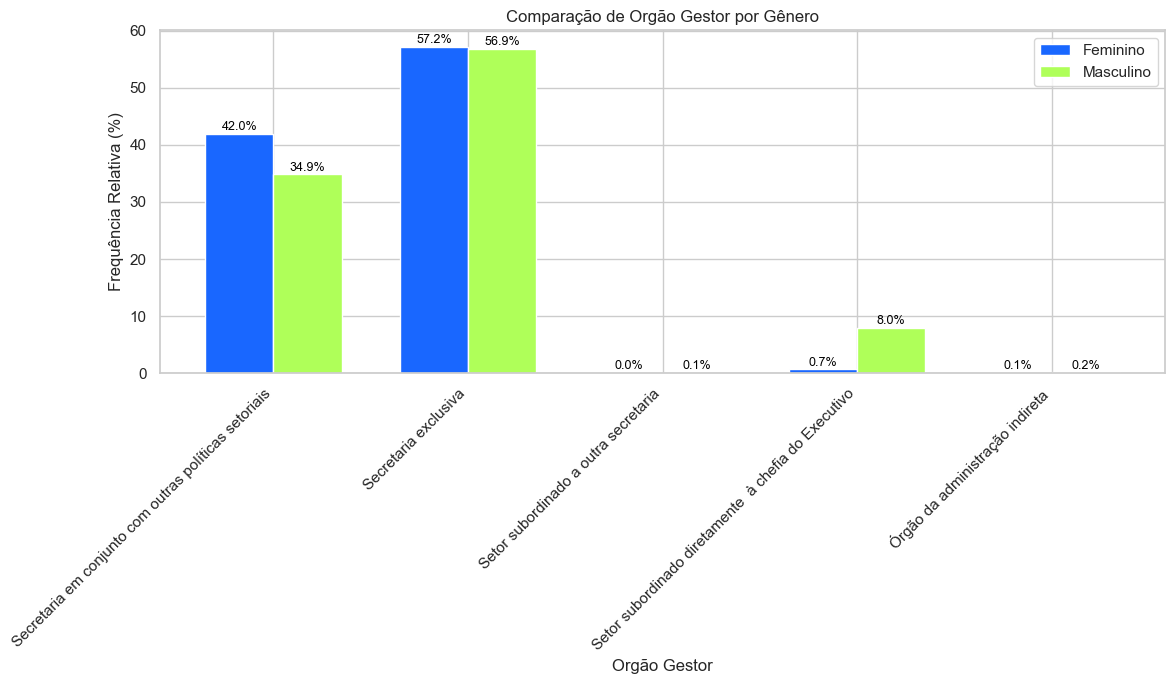

In [ ]:
# Dados de frequência relativa de orgão gestor por sexo feminino
og_edu_fem_freqrel = og_edu_fem['Frequência relativa']

# Dados de frequência relativa de orgão gestor por sexo masculino
og_edu_mas_freqrel = og_edu_mas['Frequência relativa']

# Orgãos Gestores
orgaos_gestores = og_edu_fem['Orgao Gestor']

# Posições no eixo x para as barras
posicoes = np.arange(len(orgaos_gestores))

# Largura das barras
largura_barra = 0.35

# Criação do gráfico de barras lado a lado
fig, ax = plt.subplots(figsize=(12, 7))

# Cores personalizadas para feminino e masculino
cores_feminino = '#1967FF'
cores_masculino = '#AFFF59'

# Gráfico de barras para orgão gestor por sexo feminino
bar1 = ax.bar(posicoes - largura_barra/2, og_edu_fem_freqrel, largura_barra, label='Feminino', color=cores_feminino)

# Gráfico de barras para orgão gestor por sexo masculino
bar2 = ax.bar(posicoes + largura_barra/2, og_edu_mas_freqrel, largura_barra, label='Masculino', color=cores_masculino)

# Configurações do gráfico
ax.set_xlabel('Orgão Gestor')
ax.set_ylabel('Frequência Relativa (%)')
ax.set_title('Comparação de Orgão Gestor por Gênero')
ax.set_xticks(posicoes)
ax.set_xticklabels(orgaos_gestores, rotation=45, ha='right')
ax.legend()

# Adicionando rótulos às barras
for i in range(len(orgaos_gestores)):
    plt.text(posicoes[i] - largura_barra/2, og_edu_fem_freqrel[i] + 0.1, 
             f"{og_edu_fem_freqrel[i]:.1f}%", ha='center', va='bottom', color='black', fontsize=9)
    plt.text(posicoes[i] + largura_barra/2, og_edu_mas_freqrel[i] + 0.1, 
             f"{og_edu_mas_freqrel[i]:.1f}%", ha='center', va='bottom', color='black', fontsize=9)

plt.tight_layout()
plt.show()

Não há diferença significativa entre os cargos, exceto no "Setor subordinado diretamente à chefia do Executivo", no qual homens posusem 8%, enquanto as mulheres 0.7%.

##### Quantos falaram "sim" para a classificassão racial?

In [ ]:
# Agrupando por raça
edu_fem['Raça'].value_counts()

Branca      2409
Parda       1276
Preta        168
Amarela       21
Indígena       7
Name: Raça, dtype: int64

In [ ]:
# Agrupando por autodeclaração
edu_fem[edu_fem['Autodeclara'] == 'Sim'].groupby('Raça').size().reset_index(name='Contagem').sort_values(by='Contagem', ascending=False)

,Raça,Contagem
1,Branca,1975
3,Parda,1070
4,Preta,146
0,Amarela,19
2,Indígena,6


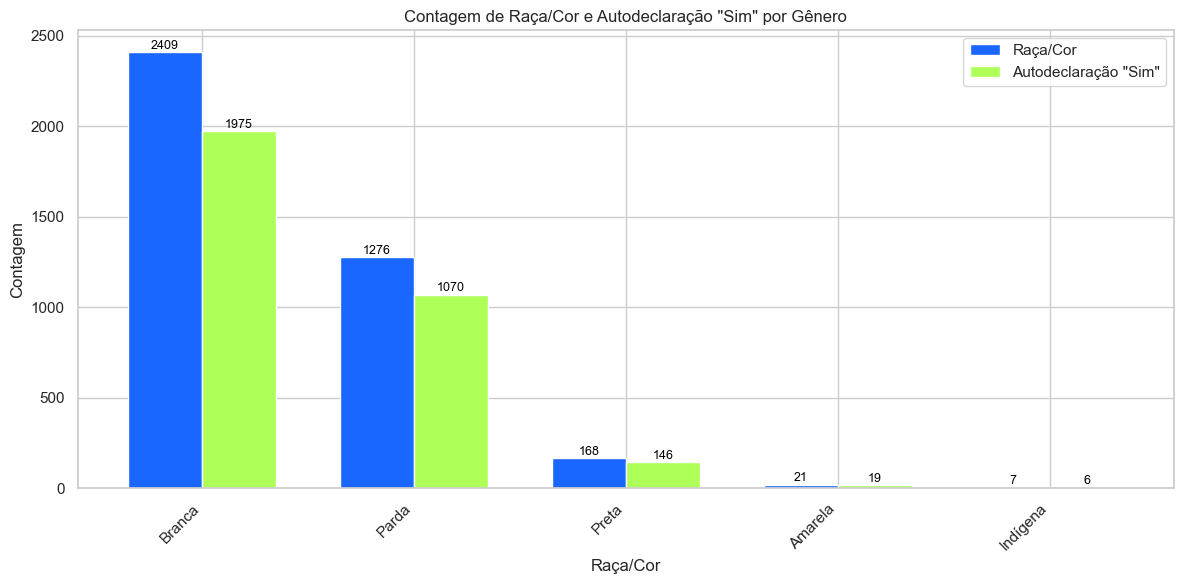

In [ ]:
# Dados de contagem de raça/cor
contagem_raca_cor_edu = edu_fem['Raça'].value_counts().reset_index()
contagem_raca_cor_edu.columns = ['Raça/Cor', 'Contagem']

# Dados de autodeclarações "Sim" por raça/cor
autodeclara_sim_edu = edu_fem[edu_fem['Autodeclara'] == 'Sim']
contagem_autodeclara_sim_edu = autodeclara_sim_edu['Raça'].value_counts().reset_index()
contagem_autodeclara_sim_edu.columns = ['Raça/Cor', 'Contagem']

# Combinar os dados eduenchendo com 0 quando ausente
contagem_combinada_edu = pd.merge(contagem_raca_cor_edu, contagem_autodeclara_sim_edu, on='Raça/Cor', how='outer').fillna(0)

# Configurar subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Cores para as barras
cores = ['#1967FF', '#AFFF59']

# Posições no eixo x para as barras
posicoes = np.arange(len(contagem_combinada_edu))

# Largura das barras
largura_barra = 0.35

# Gráfico de barras para raça/cor
ax.bar(posicoes - largura_barra/2, contagem_combinada_edu['Contagem_x'], largura_barra, label='Raça/Cor', color=cores[0])

# Gráfico de barras para autodeclarações "Sim"
ax.bar(posicoes + largura_barra/2, contagem_combinada_edu['Contagem_y'], largura_barra, label='Autodeclaração "Sim"', color=cores[1])

# Configurações do gráfico
ax.set_xlabel('Raça/Cor')
ax.set_ylabel('Contagem')
ax.set_title('Contagem de Raça/Cor e Autodeclaração "Sim" por Gênero')
ax.set_xticks(posicoes)
ax.set_xticklabels(contagem_combinada_edu['Raça/Cor'], rotation=45, ha='right')
ax.legend()

# Adicionando rótulos às barras
for i in range(len(posicoes)):
    plt.text(posicoes[i] - largura_barra/2, contagem_combinada_edu['Contagem_x'][i] + 1, 
             int(contagem_combinada_edu['Contagem_x'][i]), ha='center', va='bottom', color='black', fontsize=9)
    plt.text(posicoes[i] + largura_barra/2, contagem_combinada_edu['Contagem_y'][i] + 1, 
             int(contagem_combinada_edu['Contagem_y'][i]), ha='center', va='bottom', color='black', fontsize=9)

plt.tight_layout()
plt.show()

A maioria das pessoas classificadas como "Branca" é maior do que em qualquer outra categoria, tanto na classificação de raça/cor quanto na autodeclaração, apesar de 434 mulheres não se autodeclararem assim.

A categoria "Parda" é a segunda maior em ambas as classificações e 206 mulheres não se autodeclaram pardas. 

Essas duas categorias apresentam o maior desequibilibrio entre classificação e autodeclaração.

#### Coluna escolaridade

In [ ]:
# Agrupando por escolaridade
esc_edu = edu_fem.groupby('Escolaridade').size().reset_index(name='Frequência acumulada')
esc_edu['Frequência relativa'] = freq_rel(esc_edu['Frequência acumulada'])
esc_edu = esc_edu.sort_values(by='Frequência relativa', ascending=False)
esc_edu

,Escolaridade,Frequência acumulada,Frequência relativa
5,Especialização,2625,67.64
3,Ensino superior completo,817,21.05
6,Mestrado,282,7.27
0,Doutorado,69,1.78
4,Ensino superior incompleto,55,1.42
1,Ensino médio (2º Grau) completo,32,0.82
2,Ensino médio (2º Grau) incompleto,1,0.03


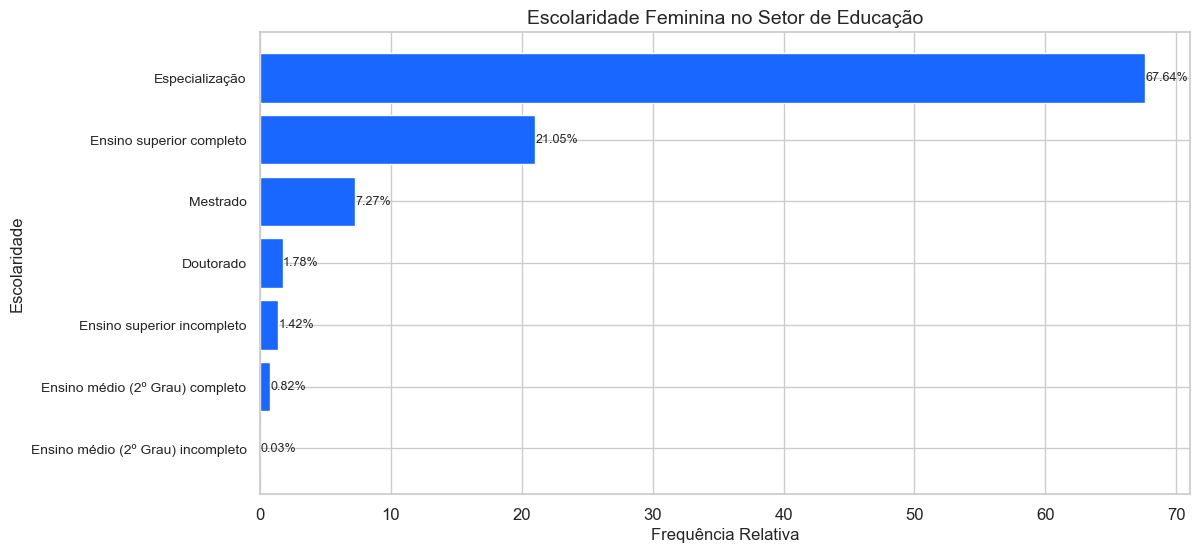

In [ ]:
# Dados
escolaridade_edu = esc_edu['Escolaridade']
frequencia_acumulada_esc_edu = esc_edu['Frequência relativa']

# Cores das barras
cores = ['#1967FF']

# Criação do gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(escolaridade_edu, frequencia_acumulada_esc_edu, color=cores)
plt.xlabel('Frequência Relativa (%)')
plt.ylabel('Escolaridade')
plt.title('Frequência Relativa por Estado')

# Personalização das fontes e limites do eixo y
plt.xticks(fontsize=12)
plt.yticks(fontsize=10) 
plt.title('Escolaridade Feminina no Setor de Educação', fontsize=14)
plt.xlabel('Frequência Relativa', fontsize=12)
plt.ylabel('Escolaridade', fontsize=12)

# Adicionando rótulos às barras
for i, v in enumerate(frequencia_acumulada_esc_edu):
    plt.text(v + 0.0, i, f'{v:.2f}%', va='center', fontsize=9)

# Definindo limites do eixo y para ajustar o tamanho dos nomes
plt.gca().invert_yaxis()  # Inverte a ordem dos escolaridade_edu

plt.show()

O nível de escolaridade das gestoras no setor educacional revela um quadro importante. Cerca de 67% delas possuíam nível de especialização. Além disso, aproximadamente 21% das gestoras tinham ensino superior completo e certa de 7% possui mestrado.

## Dados do setor de cultura

#### Tratando dados sobre de cultura

In [ ]:
# Alterando nome das colunas
dicionario_cul = df_cul.rename (columns={ 'Mun': 'Municipio',
                  'Mcul01': 'Orgao Gestor',
                  'Mcul03': 'Sexo',
                  'Mcul04': 'Idade',
                  'Mcul05': 'Raça',
                  'Mcul051': 'Autodeclara',
                  'Mcul06': 'Escolaridade'
}, inplace=True)

In [ ]:
# Alterando valores da coluna 'Regiao'
mapeamento_cul = {
    '1 - Norte': 'Norte',
    '2 - Nordeste': 'Nordeste',
    '3 - Sudeste': 'Sudeste',
    '4 - Sul': 'Sul',
    '5 - Centro-Oeste': 'Centro-Oeste',
}
df_cul['Regiao'] = df_cul['Regiao'].replace(mapeamento_cul)

#### Diferença entre homens e mulheres no setor de Cultura

In [ ]:
# Separando os sexos
cul_fem = pd.DataFrame(df_cul[df_cul['Sexo'] == 'Feminino'])
cul_mas = pd.DataFrame(df_cul[df_cul['Sexo'] == 'Masculino'])

In [ ]:
# Contagem
contagem_cul_fem = len(cul_fem)
contagem_cul_mas = len(cul_mas)

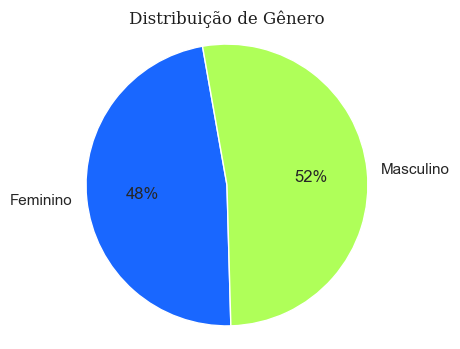

In [ ]:
# valores_cul e rótulos para o gráfico
valores_cul = [contagem_cul_fem, contagem_cul_mas]
rotulos_cul = ['Feminino', 'Masculino']

# Definindo as cores personalizadas
cores = ['#1967FF', '#AFFF59']  

# Definindo o estilo da fonte
fonte = {'family': 'serif', 'color': '#1E1E1E', 'weight': 'normal', 'size': 12}

# Criando o gráfico de pizza com cores e fonte personalizadas
plt.figure(figsize=(4, 4))
plt.pie(valores_cul, labels=rotulos_cul, autopct='%1.0f%%', startangle=100, colors=cores)
plt.title('Distribuição de Gênero', fontdict=fonte)
plt.axis('equal') 

plt.show()

No cenário do setor cultural, destaca-se um equilíbrio notável entre homens e mulheres, com as mulheres ocupando cerca de 48% dos cargos, enquanto os homens representam aproximadamente 52%.

#### Qual a distribuição geográfica no setor da cultura municipal?

In [ ]:
# Agrupando o estados
uf_cul = cul_fem.groupby('UF').size().reset_index(name='Frequência acumulada')
uf_cul['Frequência relativa'] = freq_rel(uf_cul['Frequência acumulada'])
uf_cul = uf_cul.sort_values(by='Frequência relativa', ascending=False)
uf_cul

,UF,Frequência acumulada,Frequência relativa
9,MG,402,15.52
21,RS,327,12.62
16,PR,263,10.15
24,SP,213,8.22
4,BA,187,7.22
22,SC,177,6.83
7,GO,145,5.60
13,PB,88,3.40
18,RN,84,3.24
15,PI,83,3.20


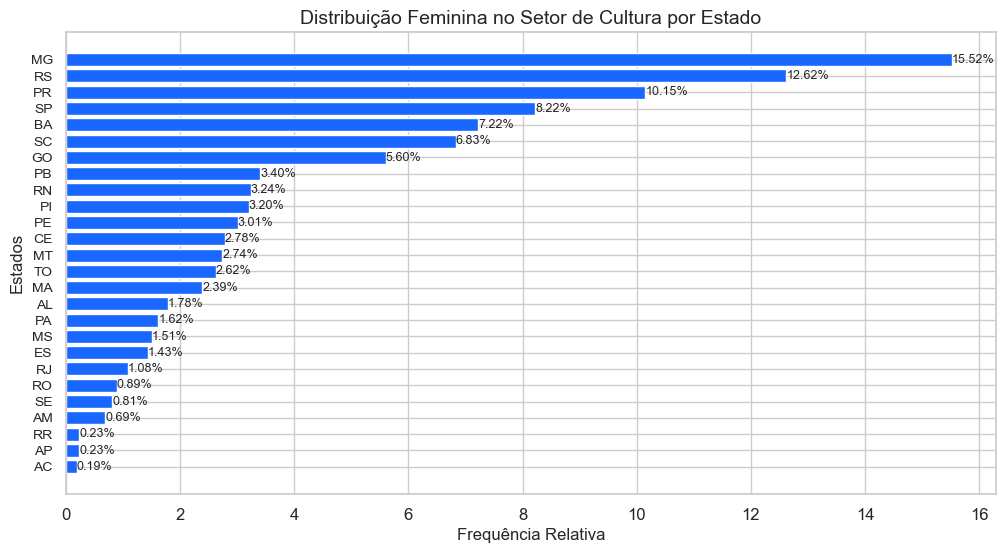

In [ ]:
# Dados
estados_cul = uf_cul['UF']
frequencia_acumulada_uf_cul = uf_cul['Frequência relativa']

# Cores das barras
cores = ['#1967FF']

# Criação do gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(estados_cul, frequencia_acumulada_uf_cul, color=cores)
plt.xlabel('Frequência Relativa (%)')
plt.ylabel('Estados')
plt.title('Frequência Relativa por Estado')

# Personalização das fontes e limites do eixo y
plt.xticks(fontsize=12)
plt.yticks(fontsize=10) 
plt.title('Distribuição Feminina no Setor de Cultura por Estado', fontsize=14)
plt.xlabel('Frequência Relativa', fontsize=12)
plt.ylabel('Estados', fontsize=12)

# Adicionando rótulos às barras
for i, v in enumerate(frequencia_acumulada_uf_cul):
    plt.text(v + 0.0, i, f'{v:.2f}%', va='center', fontsize=9)

# Definindo limites do eixo y para ajustar o tamcanho dos nomes
plt.gca().invert_yaxis()  # Inverte a ordem dos estados_cul

plt.show()

Observa-se também que, mais uma vez, o estado de Minas Gerais se destacou, liderando o ranking dos estados com a maior presença feminina nos órgãos dos municípios, atingindo uma representação significativa de 15,52%.

In [ ]:
# Agrupando as regiões
rg_cul = cul_fem.groupby('Regiao').size().reset_index(name='Frequência acumulada')
rg_cul['Frequência relativa'] = freq_rel(rg_cul['Frequência acumulada'])
rg_cul = rg_cul.sort_values(by='Frequência relativa', ascending=False)
rg_cul

,Regiao,Frequência acumulada,Frequência relativa
4,Sul,767,29.60
1,Nordeste,721,27.83
3,Sudeste,680,26.24
0,Centro-Oeste,255,9.84
2,Norte,168,6.48


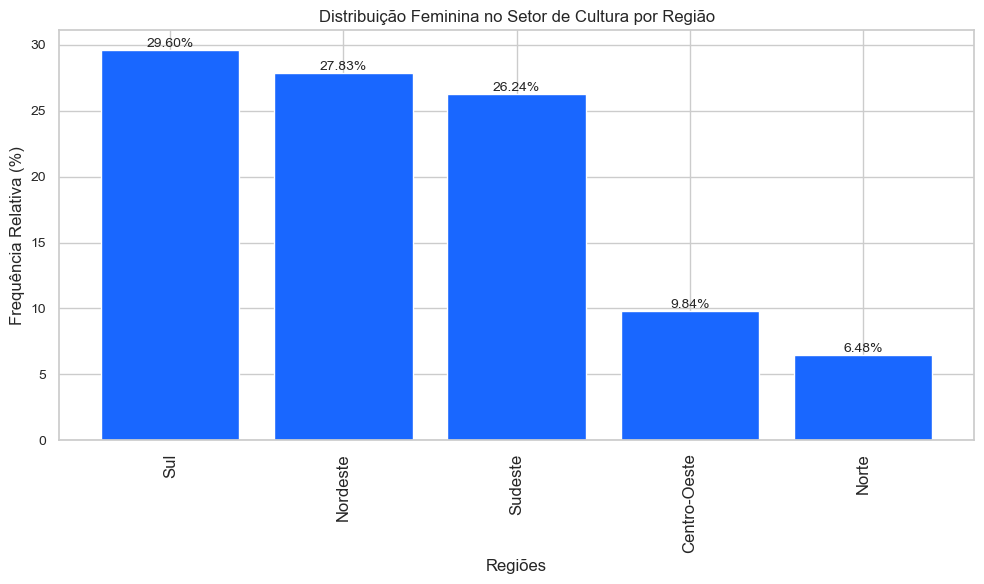

In [ ]:
# Dados
regioes_cul = rg_cul['Regiao']
frequencia_relativa_rg_cul = rg_cul['Frequência relativa']

cores = ['#1967FF']

# Criar o histograma
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=10) 
bars = plt.bar(regioes_cul, frequencia_relativa_rg_cul, color=cores)
plt.xlabel('Regiões')
plt.ylabel('Frequência Relativa (%)')
plt.title('Distribuição Feminina no Setor de Cultura por Região')
plt.xticks(rotation=90)  # Rotacionar rótulos do eixo x para melhor legibilidade

# Adicionar rótulos às barras
for bar, label in zip(bars, frequencia_relativa_rg_cul):
    plt.text(bar.get_x() + bar.get_width() / 2, label, f'{label:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Exibir o histograma
plt.show()

No que diz respeito às diferentes regiões do país, Sul, Nordeste e Sudeste apresentaram variações bastante próximas, com taxas de representação feminina de 29,60%, 27,83% e 26,24%, respectivamente. No entanto, as regiões Centro-Oeste e Norte enfrentaram desafios significativos nesse quesito, com taxas mais baixas de representatividade, atingindo apenas 9,84% e 6,48%, respectivamente.

#### Há diferença significativa entre os cargos?

In [ ]:
# Agrupando orgão gestor por sexo feminino
og_cul_fem = edu_fem.groupby('Orgao Gestor').size().reset_index(name='Frequência acumulada')
og_cul_fem['Frequência relativa'] = freq_rel(og_cul_fem['Frequência acumulada'])
og_cul_fem

,Orgao Gestor,Frequência acumulada,Frequência relativa
0,Secretaria em conjunto com outras políticas se...,1629,41.97
1,Secretaria exclusiva,2220,57.20
2,Setor subordinado a outra secretaria,1,0.03
3,Setor subordinado diretamente à chefia do Exe...,28,0.72
4,Órgão da administração indireta,3,0.08


In [ ]:
# Agrupando orgão gestor por sexo masculino
og_cul_mas = cul_mas.groupby('Orgao Gestor').size().reset_index(name='Frequência acumulada')
og_cul_mas['Frequência relativa'] = freq_rel(og_cul_mas['Frequência acumulada'])
og_cul_mas

,Orgao Gestor,Frequência acumulada,Frequência relativa
0,Secretaria em conjunto com outras políticas se...,1944,68.33
1,Secretaria exclusiva,439,15.43
2,Setor subordinado a outra secretaria,156,5.48
3,Setor subordinado diretamente à chefia do Exe...,224,7.87
4,Órgão da administração indireta,82,2.88


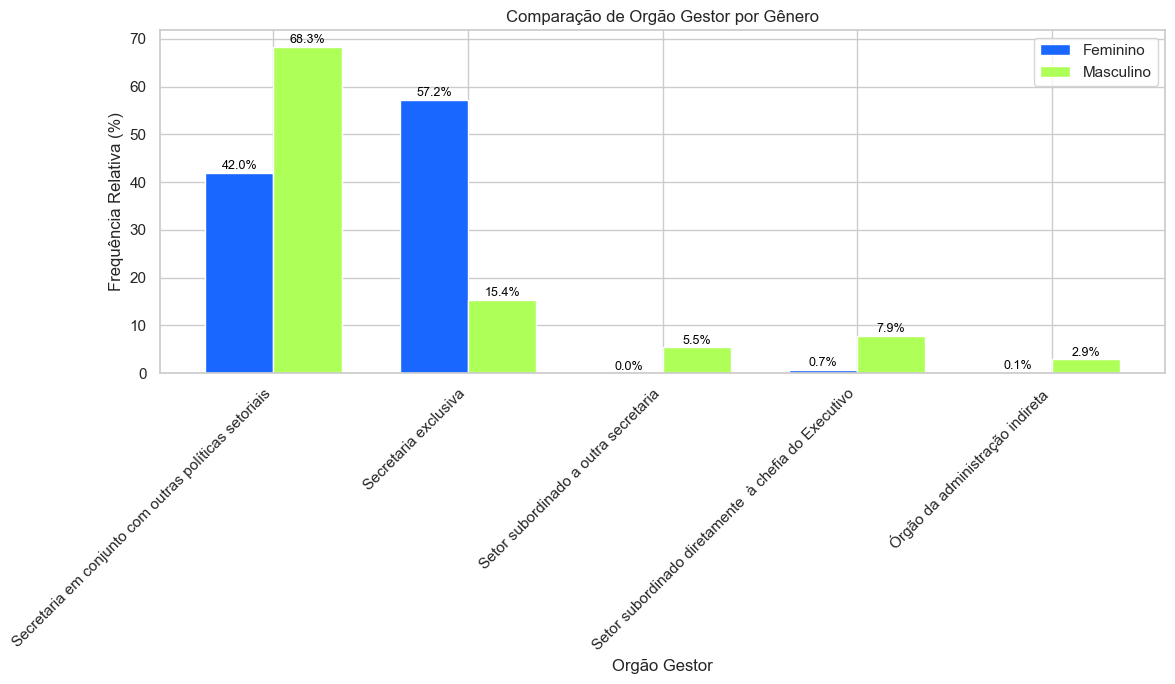

In [ ]:
# Dados de frequência relativa de orgão gestor por sexo feminino
og_cul_fem_freqrel = og_cul_fem['Frequência relativa']

# Dados de frequência relativa de orgão gestor por sexo masculino
og_cul_mas_freqrel = og_cul_mas['Frequência relativa']

# Orgãos Gestores
orgaos_gestores = og_cul_fem['Orgao Gestor']

# Posições no eixo x para as barras
posicoes = np.arange(len(orgaos_gestores))

# Largura das barras
largura_barra = 0.35

# Criação do gráfico de barras lado a lado
fig, ax = plt.subplots(figsize=(12, 7))

# Cores personalizadas para feminino e masculino
cores_feminino = '#1967FF'
cores_masculino = '#AFFF59'

# Gráfico de barras para orgão gestor por sexo feminino
bar1 = ax.bar(posicoes - largura_barra/2, og_cul_fem_freqrel, largura_barra, label='Feminino', color=cores_feminino)

# Gráfico de barras para orgão gestor por sexo masculino
bar2 = ax.bar(posicoes + largura_barra/2, og_cul_mas_freqrel, largura_barra, label='Masculino', color=cores_masculino)

# Configurações do gráfico
ax.set_xlabel('Orgão Gestor')
ax.set_ylabel('Frequência Relativa (%)')
ax.set_title('Comparação de Orgão Gestor por Gênero')
ax.set_xticks(posicoes)
ax.set_xticklabels(orgaos_gestores, rotation=45, ha='right')
ax.legend()

# Adicionando rótulos às barras
for i in range(len(orgaos_gestores)):
    plt.text(posicoes[i] - largura_barra/2, og_cul_fem_freqrel[i] + 0.1, 
             f"{og_cul_fem_freqrel[i]:.1f}%", ha='center', va='bottom', color='black', fontsize=9)
    plt.text(posicoes[i] + largura_barra/2, og_cul_mas_freqrel[i] + 0.1, 
             f"{og_cul_mas_freqrel[i]:.1f}%", ha='center', va='bottom', color='black', fontsize=9)

plt.tight_layout()
plt.show()

##### Quantos falaram "sim" para a classificassão racial?

In [ ]:
# Agrupando por raça
cul_fem['Raça'].value_counts()

Branca      1637
Parda        819
Preta        114
Amarela       17
Indígena       4
Name: Raça, dtype: int64

In [ ]:
# Agrupando por autodeclaração
cul_fem[cul_fem['Autodeclara'] == 'Sim'].groupby('Raça').size().reset_index(name='Contagem').sort_values(by='Contagem', ascending=False)

,Raça,Contagem
1,Branca,1207
3,Parda,623
4,Preta,90
0,Amarela,16
2,Indígena,3


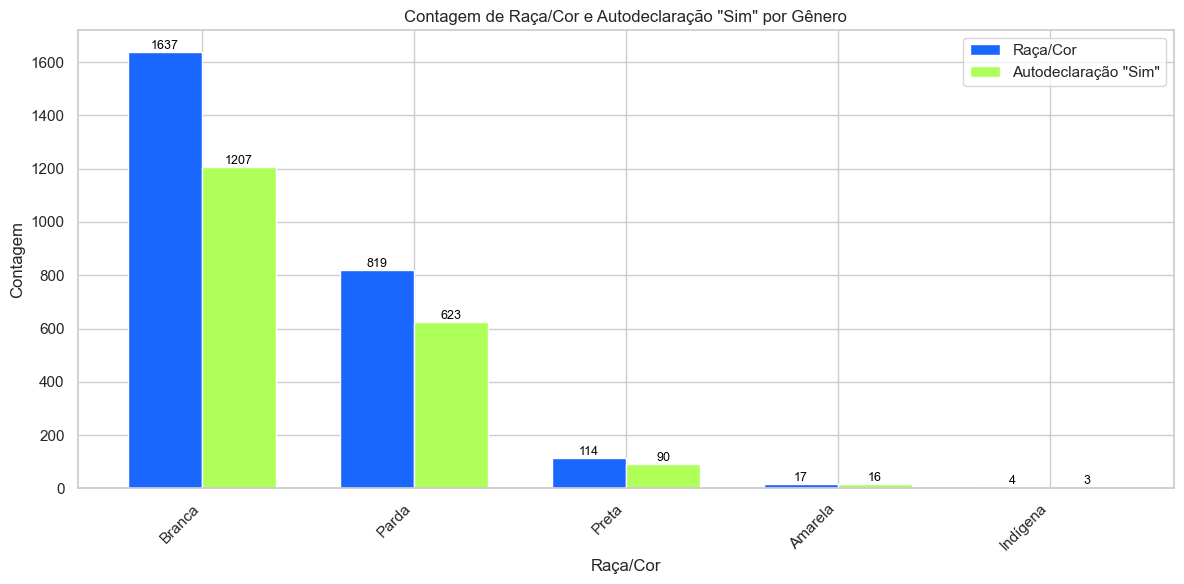

In [ ]:
# Dados de contagem de raça/cor
contagem_raca_cor_cul = cul_fem['Raça'].value_counts().reset_index()
contagem_raca_cor_cul.columns = ['Raça/Cor', 'Contagem']

# Dados de autodeclarações "Sim" por raça/cor
autodeclara_sim_cul = cul_fem[cul_fem['Autodeclara'] == 'Sim']
contagem_autodeclara_sim_cul = autodeclara_sim_cul['Raça'].value_counts().reset_index()
contagem_autodeclara_sim_cul.columns = ['Raça/Cor', 'Contagem']

# Combinar os dados culenchendo com 0 quando ausente
contagem_combinada_cul = pd.merge(contagem_raca_cor_cul, contagem_autodeclara_sim_cul, on='Raça/Cor', how='outer').fillna(0)

# Configurar subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Cores para as barras
cores = ['#1967FF', '#AFFF59']

# Posições no eixo x para as barras
posicoes = np.arange(len(contagem_combinada_cul))

# Largura das barras
largura_barra = 0.35

# Gráfico de barras para raça/cor
ax.bar(posicoes - largura_barra/2, contagem_combinada_cul['Contagem_x'], largura_barra, label='Raça/Cor', color=cores[0])

# Gráfico de barras para autodeclarações "Sim"
ax.bar(posicoes + largura_barra/2, contagem_combinada_cul['Contagem_y'], largura_barra, label='Autodeclaração "Sim"', color=cores[1])

# Configurações do gráfico
ax.set_xlabel('Raça/Cor')
ax.set_ylabel('Contagem')
ax.set_title('Contagem de Raça/Cor e Autodeclaração "Sim" por Gênero')
ax.set_xticks(posicoes)
ax.set_xticklabels(contagem_combinada_cul['Raça/Cor'], rotation=45, ha='right')
ax.legend()

# Adicionando rótulos às barras
for i in range(len(posicoes)):
    plt.text(posicoes[i] - largura_barra/2, contagem_combinada_cul['Contagem_x'][i] + 1, 
             int(contagem_combinada_cul['Contagem_x'][i]), ha='center', va='bottom', color='black', fontsize=9)
    plt.text(posicoes[i] + largura_barra/2, contagem_combinada_cul['Contagem_y'][i] + 1, 
             int(contagem_combinada_cul['Contagem_y'][i]), ha='center', va='bottom', color='black', fontsize=9)

plt.tight_layout()
plt.show()

Novamente, a classificassão e a autodeclaração seguem em desequilíbrio, principalmente na categoria "Branca" e "Parda". Um total de 430 mulheres não se identificam como "Branca", enquanto 196 mulheres também não concordam com a classificação "Parda"

#### Qual o nível de escolaridade?

In [ ]:
# Agrupando por escolaridade
esc_cul = cul_fem.groupby('Escolaridade').size().reset_index(name='Frequência acumulada')
esc_cul['Frequência relativa'] = freq_rel(esc_cul['Frequência acumulada'])
esc_cul = esc_cul.sort_values(by='Frequência relativa', ascending=False)
esc_cul

,Escolaridade,Frequência acumulada,Frequência relativa
7,Especialização,1385,53.45
5,Ensino superior completo,758,29.26
8,Mestrado,142,5.48
3,Ensino médio (2º Grau) completo,131,5.06
6,Ensino superior incompleto,121,4.67
0,Doutorado,29,1.12
4,Ensino médio (2º Grau) incompleto,12,0.46
1,Ensino fundamental (1º Grau) completo,7,0.27
2,Ensino fundamental (1º Grau) incompleto,6,0.23


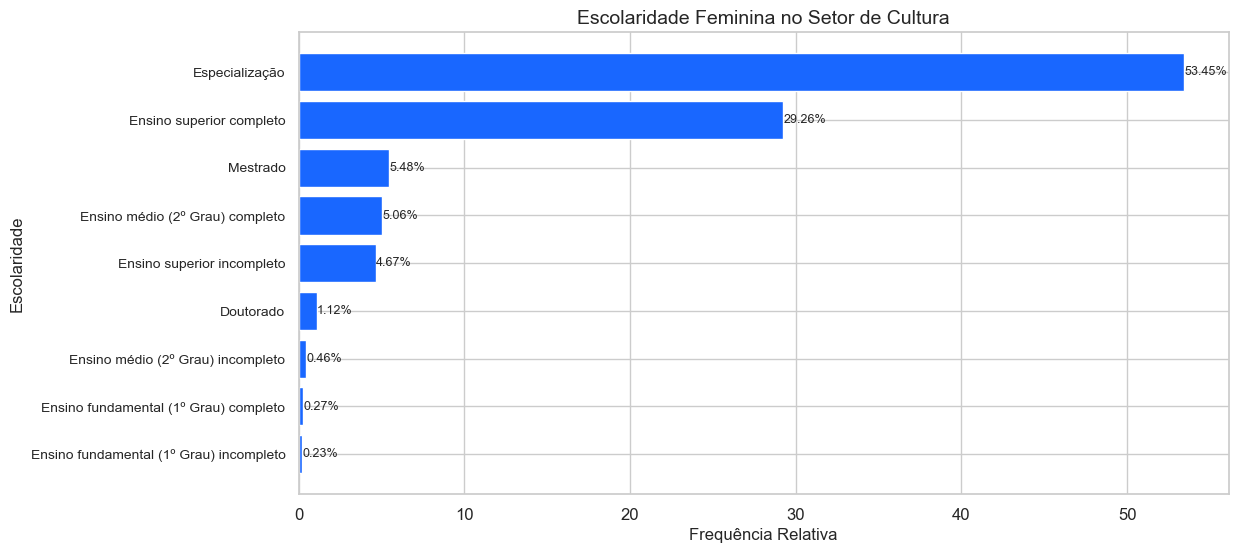

In [ ]:
# Dados
escolaridade_cul = esc_cul['Escolaridade']
frequencia_acumulada_esc_cul = esc_cul['Frequência relativa']

# Cores das barras
cores = ['#1967FF']

# Criação do gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(escolaridade_cul, frequencia_acumulada_esc_cul, color=cores)
plt.xlabel('Frequência Relativa (%)')
plt.ylabel('Escolaridade')
plt.title('Frequência Relativa por Estado')

# Personalização das fontes e limites do eixo y
plt.xticks(fontsize=12)
plt.yticks(fontsize=10) 
plt.title('Escolaridade Feminina no Setor de Cultura', fontsize=14)
plt.xlabel('Frequência Relativa', fontsize=12)
plt.ylabel('Escolaridade', fontsize=12)

# Adicionando rótulos às barras
for i, v in enumerate(frequencia_acumulada_esc_cul):
    plt.text(v + 0.0, i, f'{v:.2f}%', va='center', fontsize=9)

# Definindo limites do eixo y para ajustar o tamanho dos nomes
plt.gca().invert_yaxis()  # Inverte a ordem dos escolaridade_cul

plt.show()

A maioria das mulheres possui um nível de escolaridade mais elevado, com 53.45% delas tendo uma especialização e 29.26% com ensino superior completo. O terceriro maior grupo são de mulheres quem possuem mestrado, representando 5.48% do grupo.

## Dados sobre o setor de esporte

#### Tratando dados sobre o setor de esporte

In [ ]:
# Alterando nome das colunas
dicionario_esp = df_esp.rename (columns={ 'Mun': 'Municipio',
                  'Mesp01': 'Orgao Gestor',
                  'Mesp03': 'Sexo',
                  'Mesp04': 'Idade',
                  'Mesp05': 'Raça',
                  'Mesp051': 'Autodeclara',
                  'Mesp06': 'Escolaridade'
}, inplace=True)

In [ ]:
# Alterando valores da coluna 'Regiao'
mapeamento_esp = {
    '1 - Norte': 'Norte',
    '2 - Nordeste': 'Nordeste',
    '3 - Sudeste': 'Sudeste',
    '4 - Sul': 'Sul',
    '5 - Centro-Oeste': 'Centro-Oeste',
}
df_esp['Regiao'] = df_esp['Regiao'].replace(mapeamento_esp)

In [ ]:
df_esp.head()

,CodMun,UF,Municipio,Pop,Faixa_pop,Regiao,Orgao Gestor,Sexo,Idade,Raça,Autodeclara,Escolaridade
0,1100015,RO,Alta Floresta DOeste,22516,4 - 20001 até 50000,Norte,Secretaria em conjunto com outras políticas se...,Masculino,39,Parda,Sim,Ensino superior completo
1,1100023,RO,Ariquemes,111148,6 - 100001 até 500000,Norte,Setor subordinado diretamente à chefia do Exe...,Feminino,24,Branca,Nao,Ensino superior completo
2,1100031,RO,Cabixi,5067,2 - 5001 até 10000,Norte,Secretaria em conjunto com outras políticas se...,Feminino,51,Parda,Sim,Ensino superior completo
3,1100049,RO,Cacoal,86416,5 - 50001 até 100000,Norte,Órgão da administração indireta,Masculino,46,Branca,Sim,Ensino superior completo
4,1100056,RO,Cerejeiras,16088,3 - 10001 até 20000,Norte,Secretaria em conjunto com outras políticas se...,Feminino,57,Parda,Sim,Especialização


#### Diferença entre homens e mulheres no setor de esporte

In [ ]:
# Separando os sexos
esp_fem = pd.DataFrame(df_esp[df_esp['Sexo'] == 'Feminino'])
esp_mas = pd.DataFrame(df_esp[df_esp['Sexo'] == 'Masculino'])

In [ ]:
# Contagem
contagem_esp_fem = len(esp_fem)
contagem_esp_mas = len(esp_mas)

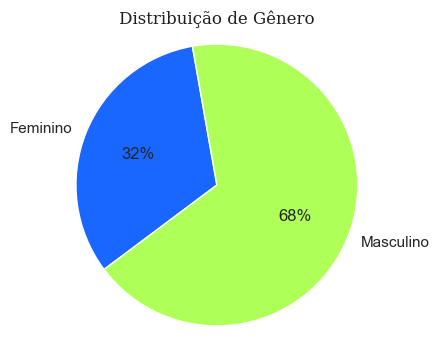

In [ ]:
# valores_esp e rótulos para o gráfico
valores_esp = [contagem_esp_fem, contagem_esp_mas]
rotulos_esp = ['Feminino', 'Masculino']

# Definindo as cores personalizadas
cores = ['#1967FF', '#AFFF59']  

# Definindo o estilo da fonte
fonte = {'family': 'serif', 'color': '#1E1E1E', 'weight': 'normal', 'size': 12}

# Criando o gráfico de pizza com cores e fonte personalizadas
plt.figure(figsize=(4, 4))
plt.pie(valores_esp, labels=rotulos_esp, autopct='%1.0f%%', startangle=100, colors=cores)
plt.title('Distribuição de Gênero', fontdict=fonte)
plt.axis('equal') 

plt.show()

Os homens ocuparam a maioria, com 68% das posições, enquanto as mulheres representaram 32% dos cargos.

#### Qual a distribuição geográfica no setor de esporte municipal?

In [ ]:
# Agrupando o estados
uf_esp = esp_fem.groupby('UF').size().reset_index(name='Frequência acumulada')
uf_esp['Frequência relativa'] = freq_rel(uf_esp['Frequência acumulada'])
uf_esp = uf_esp.sort_values(by='Frequência relativa', ascending=False)
uf_esp

,UF,Frequência acumulada,Frequência relativa
10,MG,285,16.20
22,RS,276,15.69
4,BA,160,9.10
17,PR,154,8.75
23,SC,145,8.24
25,SP,115,6.54
8,GO,77,4.38
15,PE,69,3.92
14,PB,52,2.96
12,MT,49,2.79


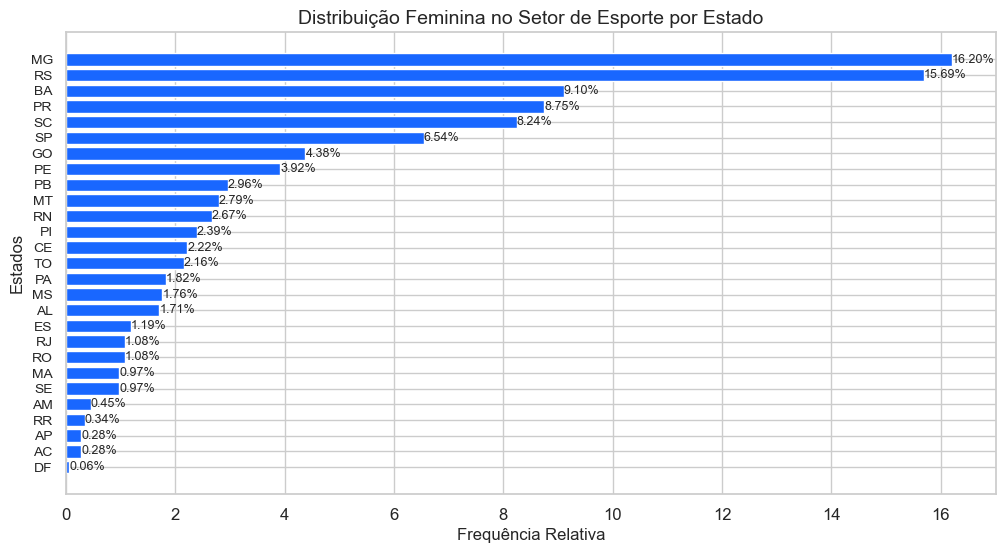

In [ ]:
# Dados
estados_esp = uf_esp['UF']
frequencia_acumulada_uf_esp = uf_esp['Frequência relativa']

# Cores das barras
cores = ['#1967FF']

# Criação do gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(estados_esp, frequencia_acumulada_uf_esp, color=cores)
plt.xlabel('Frequência Relativa (%)')
plt.ylabel('Estados')
plt.title('Frequência Relativa por Estado')

# Personalização das fontes e limites do eixo y
plt.xticks(fontsize=12)
plt.yticks(fontsize=10) 
plt.title('Distribuição Feminina no Setor de Esporte por Estado', fontsize=14)
plt.xlabel('Frequência Relativa', fontsize=12)
plt.ylabel('Estados', fontsize=12)

# Adicionando rótulos às barras
for i, v in enumerate(frequencia_acumulada_uf_esp):
    plt.text(v + 0.0, i, f'{v:.2f}%', va='center', fontsize=9)

# Definindo limites do eixo y para ajustar o tamcanho dos nomes
plt.gca().invert_yaxis()  # Inverte a ordem dos estados_esp

plt.show()

In [ ]:
# Agrupando o estados
rg_esp = esp_fem.groupby('Regiao').size().reset_index(name='Frequência acumulada')
rg_esp['Frequência relativa'] = freq_rel(rg_esp['Frequência acumulada'])
rg_esp = rg_esp.sort_values(by='Frequência relativa', ascending=False)
rg_esp

,Regiao,Frequência acumulada,Frequência relativa
4,Sul,575,32.69
1,Nordeste,473,26.89
3,Sudeste,440,25.01
0,Centro-Oeste,158,8.98
2,Norte,113,6.42


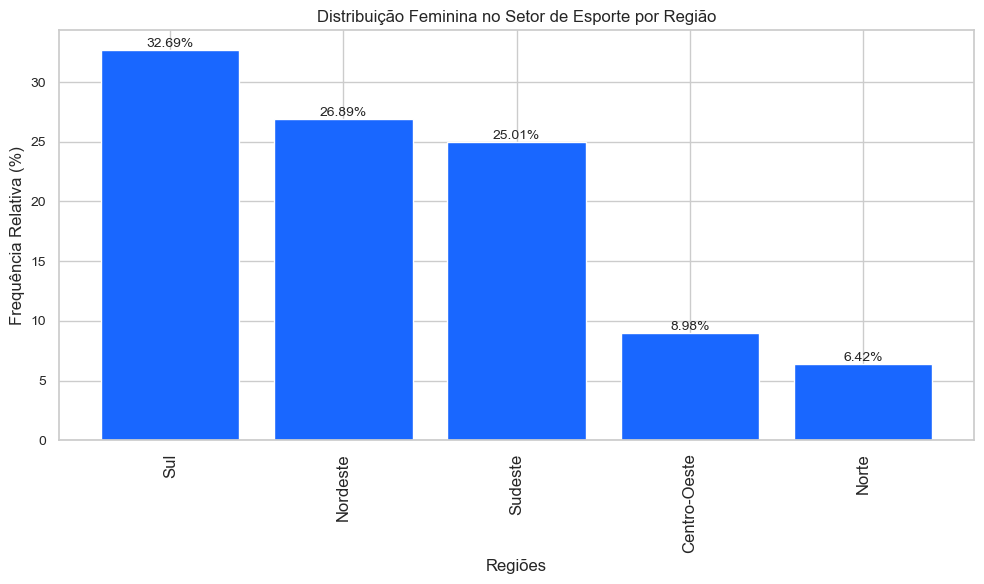

In [ ]:
# Dados
regioes_esp = rg_esp['Regiao']
frequencia_relativa_rg_esp = rg_esp['Frequência relativa']

cores = ['#1967FF']

# Criar o histograma
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=10) 
bars = plt.bar(regioes_esp, frequencia_relativa_rg_esp, color=cores)
plt.xlabel('Regiões')
plt.ylabel('Frequência Relativa (%)')
plt.title('Distribuição Feminina no Setor de Esporte por Região')
plt.xticks(rotation=90)  # Rotacionar rótulos do eixo x para melhor legibilidade

# Adicionar rótulos às barras
for bar, label in zip(bars, frequencia_relativa_rg_esp):
    plt.text(bar.get_x() + bar.get_width() / 2, label, f'{label:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Exibir o histograma
plt.show()

Assim como em outros setores, Minas Gerais também se destacou no âmbito esportivo, liderando com de 16,20%. No quisito região, o Sul, Norteste e Sudeste são os 3 maiores grupos, com 29.60%, 27.83%, 26.24% respectivamente.

#### Há diferenças significativas entre os cargos? 

In [ ]:
# Agrupando orgão gestor por sexo feminino
og_esp_fem = esp_fem.groupby('Orgao Gestor').size().reset_index(name='Frequência acumulada')
og_esp_fem['Frequência relativa'] = freq_rel(og_esp_fem['Frequência acumulada'])
og_esp_fem = og_esp_fem.sort_values(by='Frequência relativa', ascending=False)
og_esp_fem

,Orgao Gestor,Frequência acumulada,Frequência relativa
0,Secretaria em conjunto com outras políticas se...,1360,77.32
2,Setor subordinado a outra secretaria,279,15.86
1,Secretaria exclusiva,68,3.87
3,Setor subordinado diretamente à chefia do Exe...,49,2.79
4,Órgão da administração indireta,3,0.17


In [ ]:
# Agrupando orgão gestor por sexo masespino
og_esp_mas = esp_mas.groupby('Orgao Gestor').size().reset_index(name='Frequência acumulada')
og_esp_mas['Frequência relativa'] = freq_rel(og_esp_mas['Frequência acumulada'])
og_esp_mas = og_esp_mas.sort_values(by='Frequência relativa', ascending=False)
og_esp_mas

,Orgao Gestor,Frequência acumulada,Frequência relativa
0,Secretaria em conjunto com outras políticas se...,2335,63.76
1,Secretaria exclusiva,755,20.62
3,Setor subordinado diretamente à chefia do Exe...,298,8.14
2,Setor subordinado a outra secretaria,225,6.14
4,Órgão da administração indireta,49,1.34


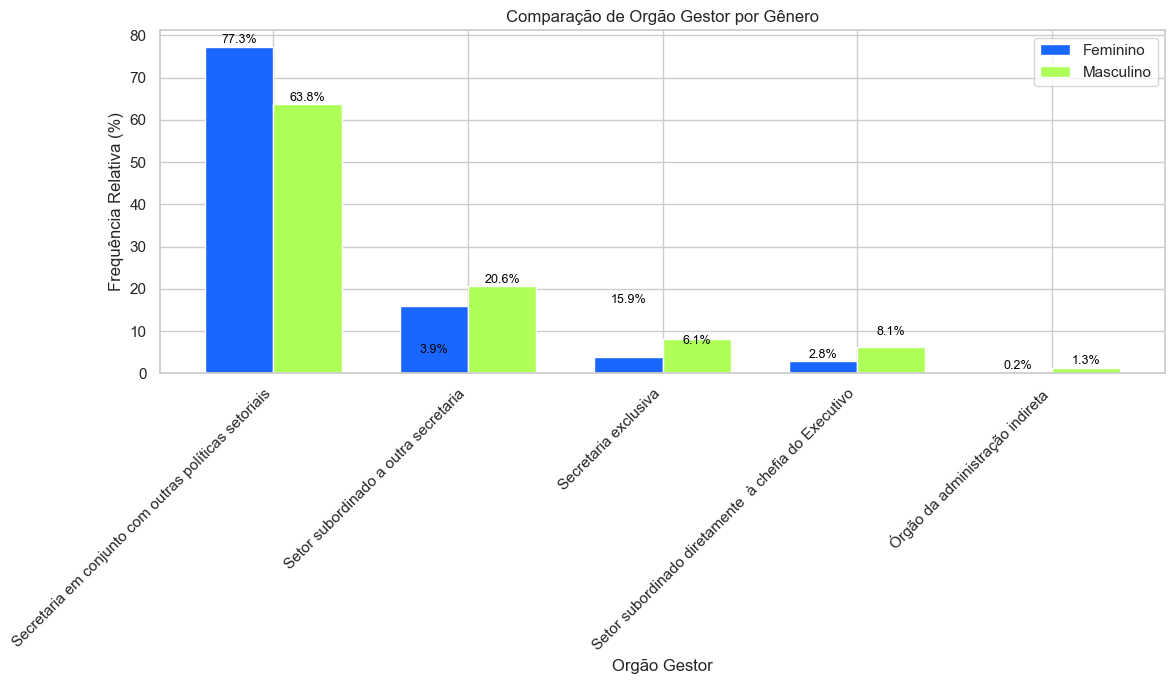

In [ ]:
# Dados de frequência relativa de orgão gestor por sexo feminino
og_esp_fem_freqrel = og_esp_fem['Frequência relativa']

# Dados de frequência relativa de orgão gestor por sexo masespino
og_esp_mas_freqrel = og_esp_mas['Frequência relativa']

# Orgãos Gestores
orgaos_gestores = og_esp_fem['Orgao Gestor']

# Posições no eixo x para as barras
posicoes = np.arange(len(orgaos_gestores))

# Largura das barras
largura_barra = 0.35

# Criação do gráfico de barras lado a lado
fig, ax = plt.subplots(figsize=(12, 7))

# Cores personalizadas para feminino e masespino
cores_feminino = '#1967FF'
cores_masespino = '#AFFF59'

# Gráfico de barras para orgão gestor por sexo feminino
bar1 = ax.bar(posicoes - largura_barra/2, og_esp_fem_freqrel, largura_barra, label='Feminino', color=cores_feminino)

# Gráfico de barras para orgão gestor por sexo masespino
bar2 = ax.bar(posicoes + largura_barra/2, og_esp_mas_freqrel, largura_barra, label='Masculino', color=cores_masespino)

# Configurações do gráfico
ax.set_xlabel('Orgão Gestor')
ax.set_ylabel('Frequência Relativa (%)')
ax.set_title('Comparação de Orgão Gestor por Gênero')
ax.set_xticks(posicoes)
ax.set_xticklabels(orgaos_gestores, rotation=45, ha='right')
ax.legend()

# Adicionando rótulos às barras
for i in range(len(orgaos_gestores)):
    plt.text(posicoes[i] - largura_barra/2, og_esp_fem_freqrel[i] + 0.1, 
             f"{og_esp_fem_freqrel[i]:.1f}%", ha='center', va='bottom', color='black', fontsize=9)
    plt.text(posicoes[i] + largura_barra/2, og_esp_mas_freqrel[i] + 0.1, 
             f"{og_esp_mas_freqrel[i]:.1f}%", ha='center', va='bottom', color='black', fontsize=9)

plt.tight_layout()
plt.show()

Observa-se que as mulheres tiveram uma presença significativa na categoria "Secretaria em conjunto com outras políticas setoriais", representando 77,32% dos cargos nessa categoria, no entanto os homens também representam uma parcela alta de 63.8% e apenas nessa categoria as mulheres lideram

##### Quantos falaram "sim" para a classificassão racial?

In [ ]:
# Agrupando por raça
esp_fem['Raça'].value_counts()

Branca      1110
Parda        561
Preta         70
Amarela       12
Indígena       6
Name: Raça, dtype: int64

In [ ]:
# Agrupando por autodeclaração
esp_fem[esp_fem['Autodeclara'] == 'Sim'].groupby('Raça').size().reset_index(name='Contagem').sort_values(by='Contagem', ascending=False)

,Raça,Contagem
1,Branca,767
3,Parda,394
4,Preta,55
0,Amarela,9
2,Indígena,5


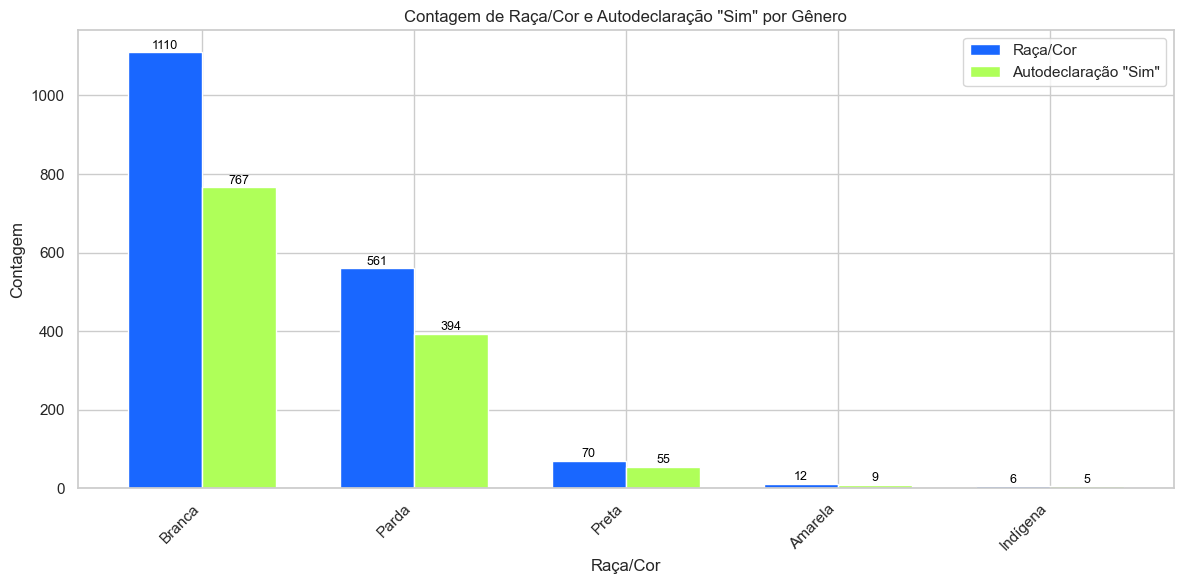

In [ ]:
# Dados de contagem de raça/cor
contagem_raca_cor_esp = esp_fem['Raça'].value_counts().reset_index()
contagem_raca_cor_esp.columns = ['Raça/Cor', 'Contagem']

# Dados de autodeclarações "Sim" por raça/cor
autodeclara_sim_esp = esp_fem[esp_fem['Autodeclara'] == 'Sim']
contagem_autodeclara_sim_esp = autodeclara_sim_esp['Raça'].value_counts().reset_index()
contagem_autodeclara_sim_esp.columns = ['Raça/Cor', 'Contagem']

# Combinar os dados espenchendo com 0 quando ausente
contagem_combinada_esp = pd.merge(contagem_raca_cor_esp, contagem_autodeclara_sim_esp, on='Raça/Cor', how='outer').fillna(0)

# Configurar subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Cores para as barras
cores = ['#1967FF', '#AFFF59']

# Posições no eixo x para as barras
posicoes = np.arange(len(contagem_combinada_esp))

# Largura das barras
largura_barra = 0.35

# Gráfico de barras para raça/cor
ax.bar(posicoes - largura_barra/2, contagem_combinada_esp['Contagem_x'], largura_barra, label='Raça/Cor', color=cores[0])

# Gráfico de barras para autodeclarações "Sim"
ax.bar(posicoes + largura_barra/2, contagem_combinada_esp['Contagem_y'], largura_barra, label='Autodeclaração "Sim"', color=cores[1])

# Configurações do gráfico
ax.set_xlabel('Raça/Cor')
ax.set_ylabel('Contagem')
ax.set_title('Contagem de Raça/Cor e Autodeclaração "Sim" por Gênero')
ax.set_xticks(posicoes)
ax.set_xticklabels(contagem_combinada_esp['Raça/Cor'], rotation=45, ha='right')
ax.legend()

# Adicionando rótulos às barras
for i in range(len(posicoes)):
    plt.text(posicoes[i] - largura_barra/2, contagem_combinada_esp['Contagem_x'][i] + 1, 
             int(contagem_combinada_esp['Contagem_x'][i]), ha='center', va='bottom', color='black', fontsize=9)
    plt.text(posicoes[i] + largura_barra/2, contagem_combinada_esp['Contagem_y'][i] + 1, 
             int(contagem_combinada_esp['Contagem_y'][i]), ha='center', va='bottom', color='black', fontsize=9)

plt.tight_layout()
plt.show()

1110 mulheres foram classificadas como brancas, mas aepans 767 dessas mulheres confirmaram tal classificação. Esse desequilíbrio perpetuou por todas as categorias.

#### Qual o nível de escolaridade?

In [ ]:
# Agrupando por escolaridade
esc_esp = esp_fem.groupby('Escolaridade').size().reset_index(name='Frequência acumulada')
esc_esp['Frequência relativa'] = freq_rel(esc_esp['Frequência acumulada'])
esc_esp = esc_esp.sort_values(by='Frequência relativa', ascending=False)
esc_esp

,Escolaridade,Frequência acumulada,Frequência relativa
7,Especialização,954,54.24
5,Ensino superior completo,509,28.94
8,Mestrado,109,6.20
3,Ensino médio (2º Grau) completo,84,4.78
6,Ensino superior incompleto,75,4.26
0,Doutorado,18,1.02
2,Ensino fundamental (1º Grau) incompleto,5,0.28
4,Ensino médio (2º Grau) incompleto,3,0.17
1,Ensino fundamental (1º Grau) completo,2,0.11


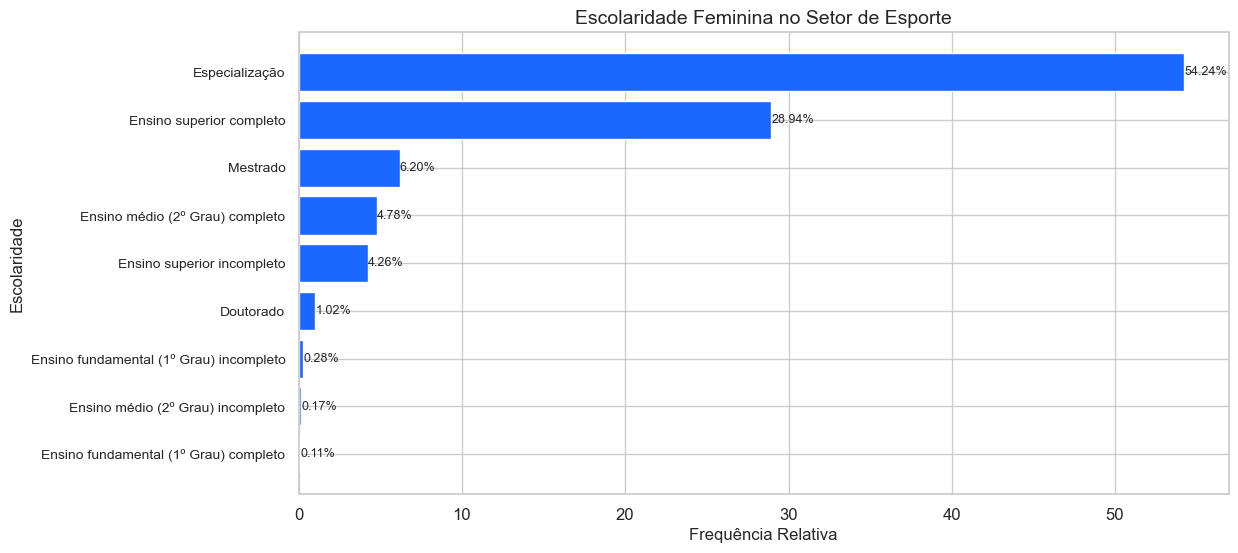

In [ ]:
# Dados
escolaridade_esp = esc_esp['Escolaridade']
frequencia_acumulada_esc_esp = esc_esp['Frequência relativa']

# Cores das barras
cores = ['#1967FF']

# Criação do gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(escolaridade_esp, frequencia_acumulada_esc_esp, color=cores)
plt.xlabel('Frequência Relativa (%)')
plt.ylabel('Escolaridade')
plt.title('Frequência Relativa por Estado')

# Personalização das fontes e limites do eixo y
plt.xticks(fontsize=12)
plt.yticks(fontsize=10) 
plt.title('Escolaridade Feminina no Setor de Esporte', fontsize=14)
plt.xlabel('Frequência Relativa', fontsize=12)
plt.ylabel('Escolaridade', fontsize=12)

# Adicionando rótulos às barras
for i, v in enumerate(frequencia_acumulada_esc_esp):
    plt.text(v + 0.0, i, f'{v:.2f}%', va='center', fontsize=9)

# Definindo limites do eixo y para ajustar o tamanho dos nomes
plt.gca().invert_yaxis()  # Inverte a ordem dos escolaridade_esp

plt.show()

Novamente, "Especialização" "Ensino superior completo" e "Mestrado", seguem sendo os maiores grupos do nível escolar das mulheres, nesse contexto com 54.24%, 28.94%, 6.20% respectivamente.

## Dados sobre o setor de saúde

#### Tratamento de dados sobre o setor de saúde

In [ ]:
# Alterando nome das colunas
dicionario_sau = df_sau.rename (columns={ 'Mun': 'Municipio',
                  'Msau01': 'Orgao Gestor',
                  'Msau03': 'Sexo',
                  'Msau04': 'Idade',
                  'Msau05': 'Raça',
                  'Msau051': 'Autodeclara',
                  'Msau06': 'Escolaridade'
}, inplace=True)

In [ ]:
# Alterando valores da coluna 'Regiao'
mapeamento_sau = {
    '1 - Norte': 'Norte',
    '2 - Nordeste': 'Nordeste',
    '3 - Sudeste': 'Sudeste',
    '4 - Sul': 'Sul',
    '5 - Centro-Oeste': 'Centro-Oeste',
}
df_sau['Regiao'] = df_sau['Regiao'].replace(mapeamento_sau)

#### Diferença entre homens e mulheres no setor de saúde

In [ ]:
# Separando os sexos
sau_fem = pd.DataFrame(df_sau[df_sau['Sexo'] == 'Feminino'])
sau_mas = pd.DataFrame(df_sau[df_sau['Sexo'] == 'Masculino'])

In [ ]:
# Contagem
contagem_sau_fem = len(sau_fem)
contagem_sau_mas = len(sau_mas)

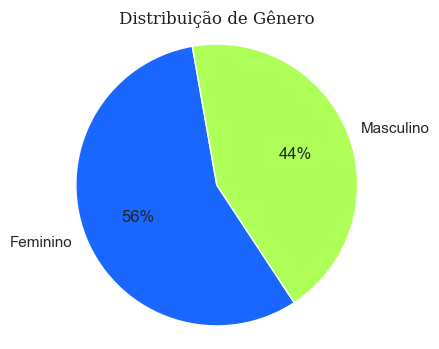

In [ ]:
# valores_sau e rótulos para o gráfico
valores_sau = [contagem_sau_fem, contagem_sau_mas]
rotulos_sau = ['Feminino', 'Masculino']

# Definindo as cores personalizadas
cores = ['#1967FF', '#AFFF59']  

# Definindo o estilo da fonte
fonte = {'family': 'serif', 'color': '#1E1E1E', 'weight': 'normal', 'size': 12}

# Criando o gráfico de pizza com cores e fonte personalizadas
plt.figure(figsize=(4, 4))
plt.pie(valores_sau, labels=rotulos_sau, autopct='%1.0f%%', startangle=100, colors=cores)
plt.title('Distribuição de Gênero', fontdict=fonte)
plt.axis('equal') 

plt.show()

No setor de saúde, as mulheres lideram com um valor ligeiramente maior de 56%.

#### Qual a distribuição geográfica no setor de sauorte municipal?

In [ ]:
# Agrupando o estados
uf_sau = sau_fem.groupby('UF').size().reset_index(name='Frequência acumulada')
uf_sau['Frequência relativa'] = freq_rel(uf_sau['Frequência acumulada'])
uf_sau = uf_sau.sort_values(by='Frequência relativa', ascending=False)
uf_sau

,UF,Frequência acumulada,Frequência relativa
9,MG,476,15.14
24,SP,324,10.31
21,RS,255,8.11
4,BA,242,7.70
16,PR,237,7.54
13,PB,159,5.06
22,SC,154,4.90
7,GO,138,4.39
15,PI,135,4.30
14,PE,134,4.26


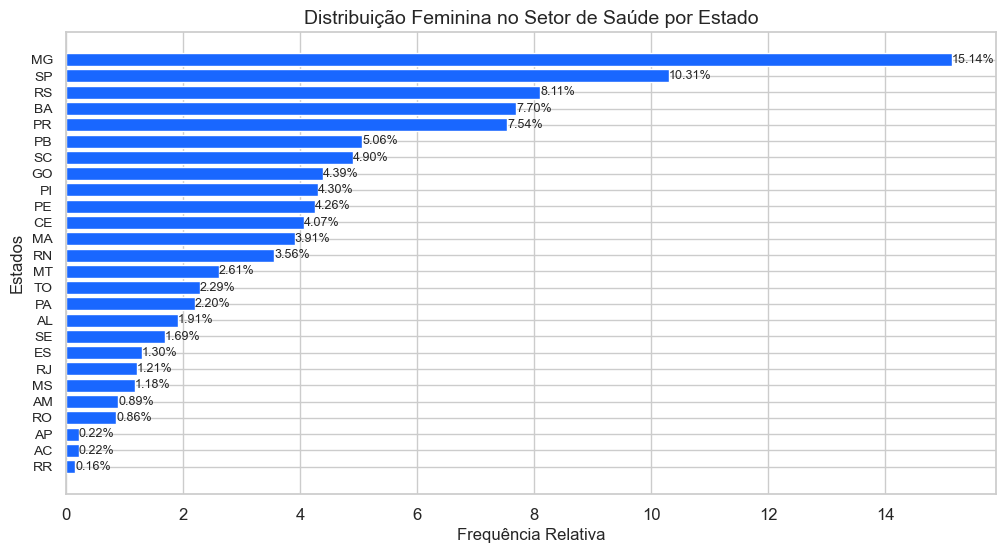

In [ ]:
# Dados
estados_sau = uf_sau['UF']
frequencia_acumulada_uf_sau = uf_sau['Frequência relativa']

# Cores das barras
cores = ['#1967FF']

# Criação do gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(estados_sau, frequencia_acumulada_uf_sau, color=cores)
plt.xlabel('Frequência Relativa (%)')
plt.ylabel('Estados')
plt.title('Frequência Relativa por Estado')

# Personalização das fontes e limites do eixo y
plt.xticks(fontsize=12)
plt.yticks(fontsize=10) 
plt.title('Distribuição Feminina no Setor de Saúde por Estado', fontsize=14)
plt.xlabel('Frequência Relativa', fontsize=12)
plt.ylabel('Estados', fontsize=12)

# Adicionando rótulos às barras
for i, v in enumerate(frequencia_acumulada_uf_sau):
    plt.text(v + 0.0, i, f'{v:.2f}%', va='center', fontsize=9)

# Definindo limites do eixo y para ajustar o tamcanho dos nomes
plt.gca().invert_yaxis()  # Inverte a ordem dos estados_sau

plt.show()

In [ ]:
# Agrupando o estados
rg_sau = sau_fem.groupby('Regiao').size().reset_index(name='Frequência acumulada')
rg_sau['Frequência relativa'] = freq_rel(rg_sau['Frequência acumulada'])
rg_sau = rg_sau.sort_values(by='Frequência relativa', ascending=False)
rg_sau

,Regiao,Frequência acumulada,Frequência relativa
1,Nordeste,1146,36.46
3,Sudeste,879,27.97
4,Sul,646,20.55
0,Centro-Oeste,257,8.18
2,Norte,215,6.84


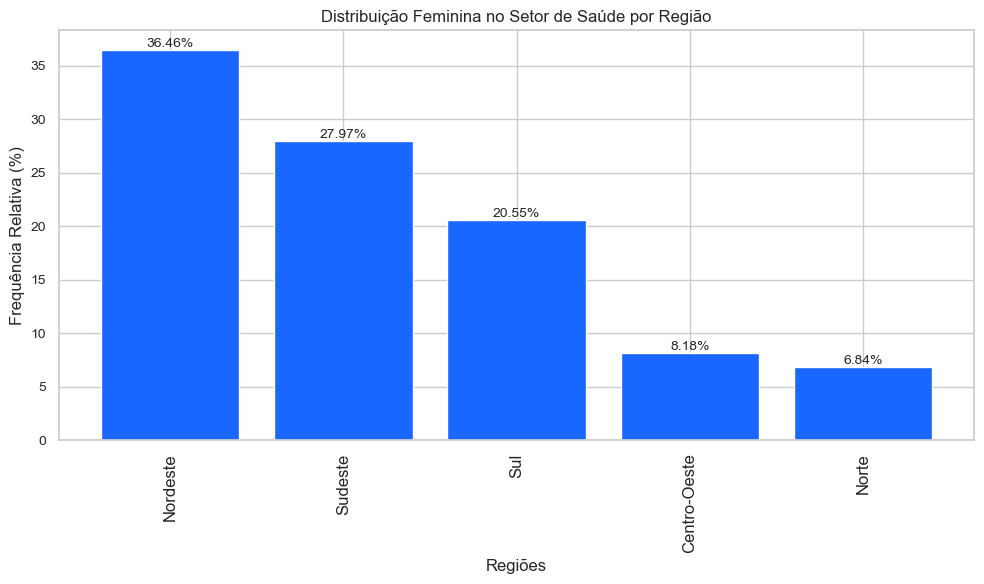

In [ ]:
# Dados
regioes_sau = rg_sau['Regiao']
frequencia_relativa_rg_sau = rg_sau['Frequência relativa']

cores = ['#1967FF']

# Criar o histograma
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=10) 
bars = plt.bar(regioes_sau, frequencia_relativa_rg_sau, color=cores)
plt.xlabel('Regiões')
plt.ylabel('Frequência Relativa (%)')
plt.title('Distribuição Feminina no Setor de Saúde por Região')
plt.xticks(rotation=90)  # Rotacionar rótulos do eixo x para melhor legibilidade

# Adicionar rótulos às barras
for bar, label in zip(bars, frequencia_relativa_rg_sau):
    plt.text(bar.get_x() + bar.get_width() / 2, label, f'{label:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Exibir o histograma
plt.show()

Minas Gerais liderou em todos os setores, inclusive no de saúde, com 15.14% e a região Nordeste é a região com mais frequência, com 36.46% e as regiões Centro-Oeste e Norte ainda apresentam desafios em termos de representação feminina, mantendo-se como as regiões com menor presença de mulheres nos órgãos públicos municipais.

#### Há diferenças significativas entre os cargos? 

In [ ]:
# Agrupando orgão gestor por sexo feminino
og_sau_fem = sau_fem.groupby('Orgao Gestor').size().reset_index(name='Frequência acumulada')
og_sau_fem['Frequência relativa'] = freq_rel(og_sau_fem['Frequência acumulada'])
og_sau_fem

,Orgao Gestor,Frequência acumulada,Frequência relativa
0,Secretaria em conjunto com outras políticas s...,168,5.35
1,Secretaria exclusiva,2946,93.73
2,Setor subordinado a outra secretaria,1,0.03
3,Setor subordinado diretamente à chefia do Exe...,24,0.76
4,Órgão da administração indireta,4,0.13


In [ ]:
# Agrupando orgão gestor por sexo massauino
og_sau_mas = sau_mas.groupby('Orgao Gestor').size().reset_index(name='Frequência acumulada')
og_sau_mas['Frequência relativa'] = freq_rel(og_sau_mas['Frequência acumulada'])
og_sau_mas

,Orgao Gestor,Frequência acumulada,Frequência relativa
0,Secretaria em conjunto com outras políticas s...,137,5.66
1,Secretaria exclusiva,2157,89.10
2,Setor subordinado a outra secretaria,1,0.04
3,Setor subordinado diretamente à chefia do Exe...,116,4.79
4,Órgão da administração indireta,10,0.41


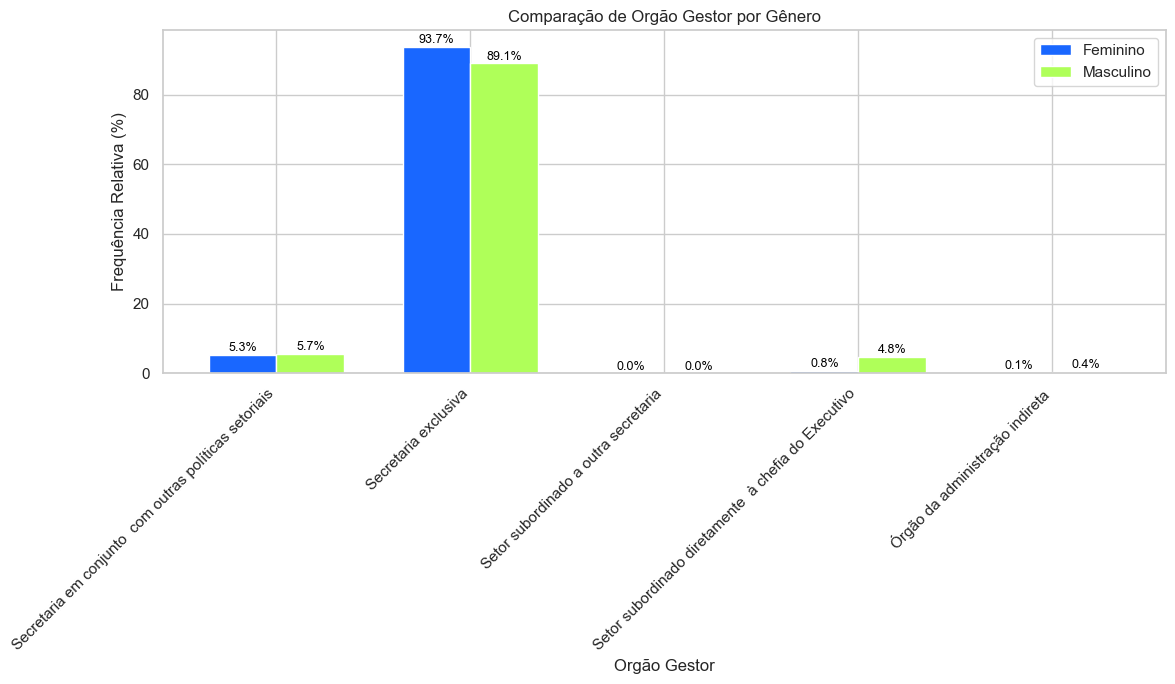

In [ ]:
# Dados de frequência relativa de orgão gestor por sexo feminino
og_sau_fem_freqrel = og_sau_fem['Frequência relativa']

# Dados de frequência relativa de orgão gestor por sexo massauino
og_sau_mas_freqrel = og_sau_mas['Frequência relativa']

# Orgãos Gestores
orgaos_gestores = og_sau_fem['Orgao Gestor']

# Posições no eixo x para as barras
posicoes = np.arange(len(orgaos_gestores))

# Largura das barras
largura_barra = 0.35

# Criação do gráfico de barras lado a lado
fig, ax = plt.subplots(figsize=(12, 7))

# Cores personalizadas para feminino e massauino
cores_feminino = '#1967FF'
cores_massauino = '#AFFF59'

# Gráfico de barras para orgão gestor por sexo feminino
bar1 = ax.bar(posicoes - largura_barra/2, og_sau_fem_freqrel, largura_barra, label='Feminino', color=cores_feminino)

# Gráfico de barras para orgão gestor por sexo massauino
bar2 = ax.bar(posicoes + largura_barra/2, og_sau_mas_freqrel, largura_barra, label='Masculino', color=cores_massauino)

# Configurações do gráfico
ax.set_xlabel('Orgão Gestor')
ax.set_ylabel('Frequência Relativa (%)')
ax.set_title('Comparação de Orgão Gestor por Gênero')
ax.set_xticks(posicoes)
ax.set_xticklabels(orgaos_gestores, rotation=45, ha='right')
ax.legend()

# Adicionando rótulos às barras
for i in range(len(orgaos_gestores)):
    plt.text(posicoes[i] - largura_barra/2, og_sau_fem_freqrel[i] + 0.1, 
             f"{og_sau_fem_freqrel[i]:.1f}%", ha='center', va='bottom', color='black', fontsize=9)
    plt.text(posicoes[i] + largura_barra/2, og_sau_mas_freqrel[i] + 0.1, 
             f"{og_sau_mas_freqrel[i]:.1f}%", ha='center', va='bottom', color='black', fontsize=9)

plt.tight_layout()
plt.show()

"Secretaria esclusiva" apresenta o maior índice de ocorrências para os 2 gêneros. Mas as mulheres se destacaram com 93.7% em comparação com os homens(89.%)

##### Quantos falaram "sim" para a classificassão racial?

In [ ]:
# Agrupando por raça
sau_fem['Raça'].value_counts()

Branca      1964
Parda       1055
Preta        104
Amarela       16
Indígena       4
Name: Raça, dtype: int64

In [ ]:
# Agrupando por autodeclaração
sau_fem[sau_fem['Autodeclara'] == 'Sim'].groupby('Raça').size().reset_index(name='Contagem').sort_values(by='Contagem', ascending=False)

,Raça,Contagem
1,Branca,1488
3,Parda,828
4,Preta,86
0,Amarela,14
2,Indígena,4


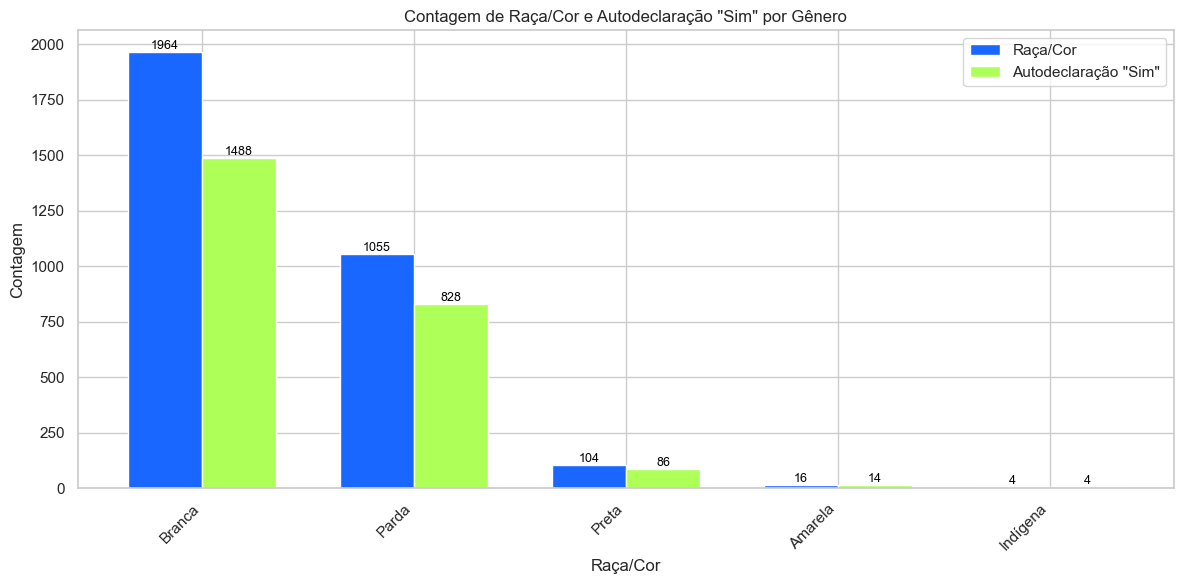

In [ ]:
# Dados de contagem de raça/cor
contagem_raca_cor_sau = sau_fem['Raça'].value_counts().reset_index()
contagem_raca_cor_sau.columns = ['Raça/Cor', 'Contagem']

# Dados de autodeclarações "Sim" por raça/cor
autodeclara_sim_sau = sau_fem[sau_fem['Autodeclara'] == 'Sim']
contagem_autodeclara_sim_sau = autodeclara_sim_sau['Raça'].value_counts().reset_index()
contagem_autodeclara_sim_sau.columns = ['Raça/Cor', 'Contagem']

# Combinar os dados sauenchendo com 0 quando ausente
contagem_combinada_sau = pd.merge(contagem_raca_cor_sau, contagem_autodeclara_sim_sau, on='Raça/Cor', how='outer').fillna(0)

# Configurar subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Cores para as barras
cores = ['#1967FF', '#AFFF59']

# Posições no eixo x para as barras
posicoes = np.arange(len(contagem_combinada_sau))

# Largura das barras
largura_barra = 0.35

# Gráfico de barras para raça/cor
ax.bar(posicoes - largura_barra/2, contagem_combinada_sau['Contagem_x'], largura_barra, label='Raça/Cor', color=cores[0])

# Gráfico de barras para autodeclarações "Sim"
ax.bar(posicoes + largura_barra/2, contagem_combinada_sau['Contagem_y'], largura_barra, label='Autodeclaração "Sim"', color=cores[1])

# Configurações do gráfico
ax.set_xlabel('Raça/Cor')
ax.set_ylabel('Contagem')
ax.set_title('Contagem de Raça/Cor e Autodeclaração "Sim" por Gênero')
ax.set_xticks(posicoes)
ax.set_xticklabels(contagem_combinada_sau['Raça/Cor'], rotation=45, ha='right')
ax.legend()

# Adicionando rótulos às barras
for i in range(len(posicoes)):
    plt.text(posicoes[i] - largura_barra/2, contagem_combinada_sau['Contagem_x'][i] + 1, 
             int(contagem_combinada_sau['Contagem_x'][i]), ha='center', va='bottom', color='black', fontsize=9)
    plt.text(posicoes[i] + largura_barra/2, contagem_combinada_sau['Contagem_y'][i] + 1, 
             int(contagem_combinada_sau['Contagem_y'][i]), ha='center', va='bottom', color='black', fontsize=9)

plt.tight_layout()
plt.show()

As categorias de classificação "Branca" e "Parda" são novamente as categorias com maior ocorrencia e a classificação de mulheres brancas continuam liderando em todos os setores.

#### Qual o nível de escolaridade?

In [ ]:
# Agrupando por escolaridade
esc_sau = sau_fem.groupby('Escolaridade').size().reset_index(name='Frequência acumulada')
esc_sau['Frequência relativa'] = freq_rel(esc_sau['Frequência acumulada'])
esc_sau = esc_sau.sort_values(by='Frequência relativa', ascending=False)
esc_sau

,Escolaridade,Frequência acumulada,Frequência relativa
7,Especialização,1346,42.83
5,Ensino superior completo,1233,39.23
3,Ensino médio (2º Grau) completo,256,8.15
6,Ensino superior incompleto,148,4.71
8,Mestrado,109,3.47
0,Doutorado,26,0.83
4,Ensino médio (2º Grau) incompleto,16,0.51
1,Ensino fundamental (1º Grau) completo,7,0.22
2,Ensino fundamental (1º Grau) incompleto,2,0.06


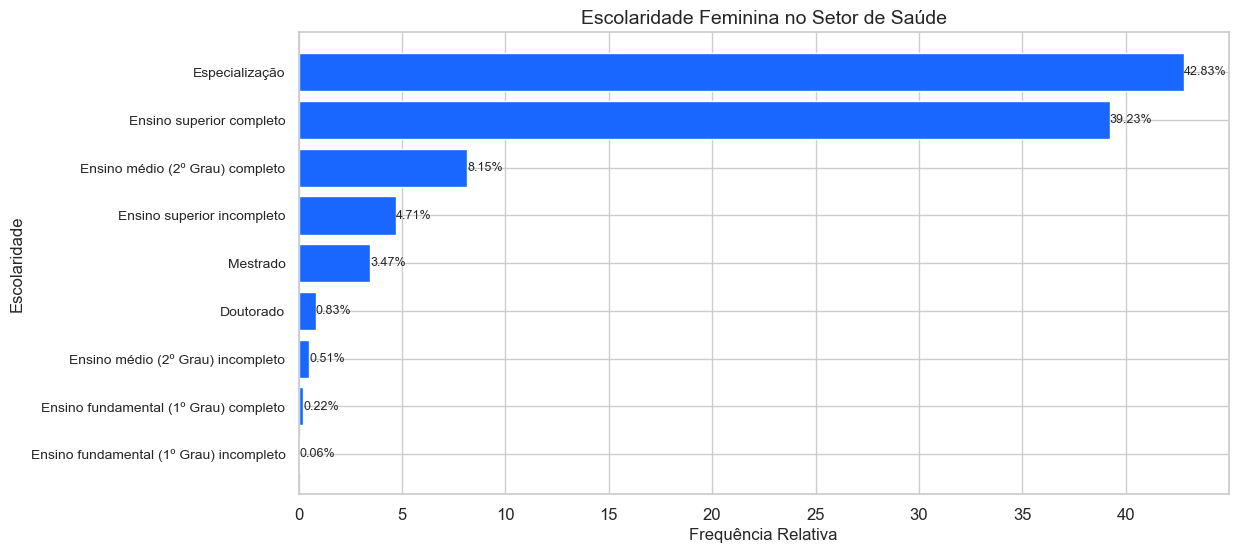

In [ ]:
# Dados
escolaridade_sau = esc_sau['Escolaridade']
frequencia_acumulada_esc_sau = esc_sau['Frequência relativa']

# Cores das barras
cores = ['#1967FF']

# Criação do gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(escolaridade_sau, frequencia_acumulada_esc_sau, color=cores)
plt.xlabel('Frequência Relativa (%)')
plt.ylabel('Escolaridade')
plt.title('Frequência Relativa por Estado')

# Personalização das fontes e limites do eixo y
plt.xticks(fontsize=12)
plt.yticks(fontsize=10) 
plt.title('Escolaridade Feminina no Setor de Saúde', fontsize=14)
plt.xlabel('Frequência Relativa', fontsize=12)
plt.ylabel('Escolaridade', fontsize=12)

# Adicionando rótulos às barras
for i, v in enumerate(frequencia_acumulada_esc_sau):
    plt.text(v + 0.0, i, f'{v:.2f}%', va='center', fontsize=9)

# Definindo limites do eixo y para ajustar o tamanho dos nomes
plt.gca().invert_yaxis()  # Inverte a ordem dos escolaridade_sau

plt.show()

"Especilização" e "Ensino superior completo" são os 2 maiores grupos de escolaridade no setor de saúde, com 42.83% e 39.23% respectivamente. O "Ensino médio (2º Grau) completo" o terceiro maior com 8.15%.

## Dados gerais

#### Qual a quantidade de mulheres em todos os setores?

In [ ]:
# Feminino
geral_fem = (contagem_pre_fem, contagem_edu_fem, contagem_cul_fem, contagem_esp_fem, contagem_sau_fem)
contagem_geral_fem = np.sum(geral_fem)

In [ ]:
# Masculino
geral_mas = (contagem_pre_mas, contagem_edu_mas, contagem_cul_mas, contagem_esp_mas, contagem_sau_mas)
contagem_geral_mas = np.sum(geral_mas)

In [ ]:
sexo = ['Feminino', 'Masculino']
contagem = [contagem_geral_fem, contagem_geral_mas]
geral = pd.DataFrame({'Sexo': sexo, 'Contagem': contagem})
geral['Frequencia relativa'] = freq_rel(geral['Contagem'])
geral

,Sexo,Contagem,Frequencia relativa
0,Feminino,12048,43.72
1,Masculino,15508,56.28


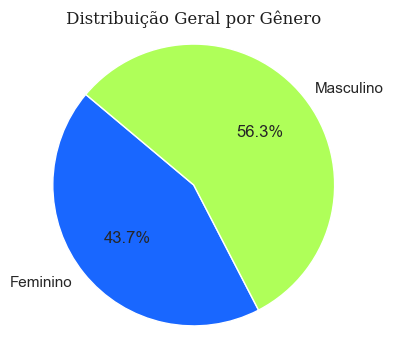

In [ ]:
# Definindo as cores personalizadas
cores = ['#1967FF', '#AFFF59']  

# Definindo o estilo da fonte
fonte = {'family': 'serif', 'color': '#1E1E1E', 'weight': 'normal', 'size': 12}

plt.figure(figsize=(4,4))
plt.pie(geral['Frequencia relativa'], labels=geral['Sexo'], autopct='%1.1f%%', startangle=140, colors=cores)
plt.title('Distribuição Geral por Gênero', fontdict=fonte)
plt.axis('equal') 

plt.show()

#### Qual é a estimativa populacional das cidades onde a presença feminina está alocada no cargos públicos?

In [ ]:
geral_fem = pd.concat([pre_fem, edu_fem, cul_fem, esp_fem, sau_fem])

In [ ]:
geral_fem['Faixa_pop'].value_counts()

1 - Até 5000             3024
3 - 10001 até 20000      2907
2 - 5001 até 10000       2680
4 - 20001 até 50000      2256
5 - 50001 até 100000      649
6 - 100001 até 500000     467
7 - Maior que 500000       65
Name: Faixa_pop, dtype: int64

#### Tratando dados da variável "Faixa_pop"

In [ ]:
# Gerando uma nova faixa populacional

# Dados da população
dados = geral_fem['Pop']

# Defina manualmente os limites dos intervalos
intervalos = [
    (0, 5000),
    (5001, 10000),
    (10001, 20000),
    (20001, 50000),
    (50001, 100000),
    (100001, 500000),
    (500001, max(dados))
]

# Função para atribuir faixa populacional com base no valor de população
def atribuir_faixa_populacional(valor):
    for i, (min_intervalo, max_intervalo) in enumerate(intervalos):
        if min_intervalo <= valor <= max_intervalo:
            return f"{min_intervalo} - {max_intervalo}"

# Aplicar a função para criar a nova coluna 'Faixa Populacional' no DataFrame
geral_fem['Faixa Populacional'] = geral_fem['Pop'].apply(atribuir_faixa_populacional)

In [ ]:
# Excluindo a variável 'Faixa_pop' antiga
geral_fem.drop(columns=['Faixa_pop'], inplace=True)

<Axes: xlabel='Faixa Populacional', ylabel='count'>

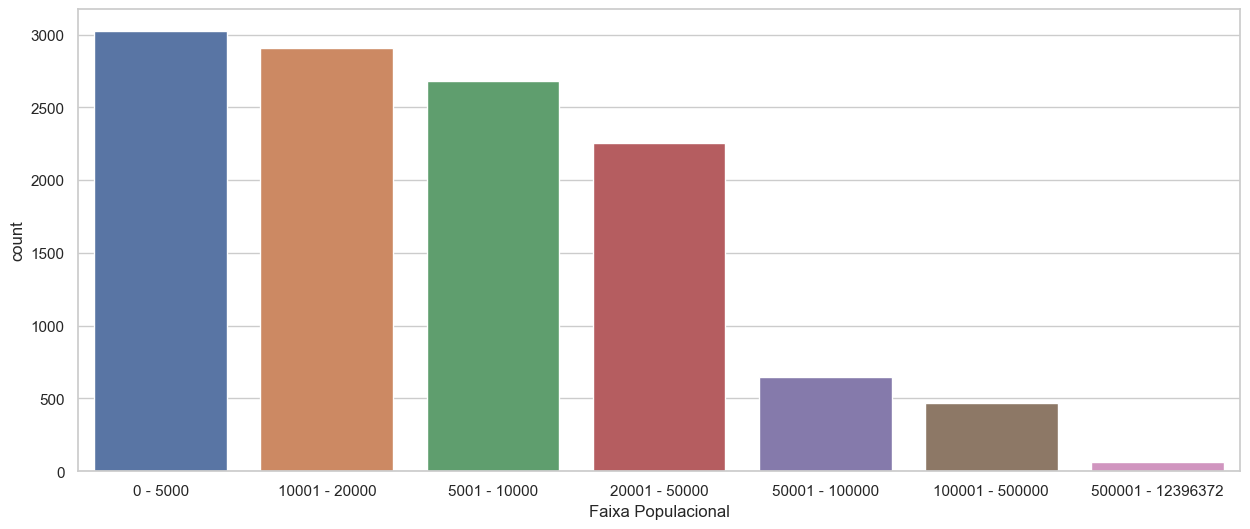

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Faixa Populacional', data=geral_fem, order=geral_fem['Faixa Populacional'].value_counts().index)


#### Qual é a estimativa populacional das cidades onde a presença masculina está alocada no cargos públicos?

In [ ]:
geral_mas = pd.concat([pre_mas, edu_mas, cul_mas, esp_mas, sau_mas])

In [ ]:
geral_mas['Faixa_pop'].value_counts()

3 - 10001 até 20000      3636
4 - 20001 até 50000      3318
2 - 5001 até 10000       3236
1 - Até 5000             3104
5 - 50001 até 100000     1121
6 - 100001 até 500000     913
7 - Maior que 500000      180
Name: Faixa_pop, dtype: int64

#### Tratando dados da variável "Faixa_pop"

In [ ]:
# Gerando uma nova faixa populacional

# Dados da população
dados = geral_mas['Pop']

# Defina manualmente os limites dos intervalos
intervalos = [
    (0, 5000),
    (5001, 10000),
    (10001, 20000),
    (20001, 50000),
    (50001, 100000),
    (100001, 500000),
    (500001, max(dados))
]

# Função para atribuir faixa populacional com base no valor de população
def atribuir_faixa_populacional(valor):
    for i, (min_intervalo, max_intervalo) in enumerate(intervalos):
        if min_intervalo <= valor <= max_intervalo:
            return f"{min_intervalo} - {max_intervalo}"

# Aplicar a função para criar a nova coluna 'Faixa Populacional' no DataFrame
geral_mas['Faixa Populacional'] = geral_mas['Pop'].apply(atribuir_faixa_populacional)

In [ ]:
# Excluindo a variável 'Faixa_pop' antiga
geral_mas.drop(columns=['Faixa_pop'], inplace=True)

<Axes: xlabel='Faixa Populacional', ylabel='count'>

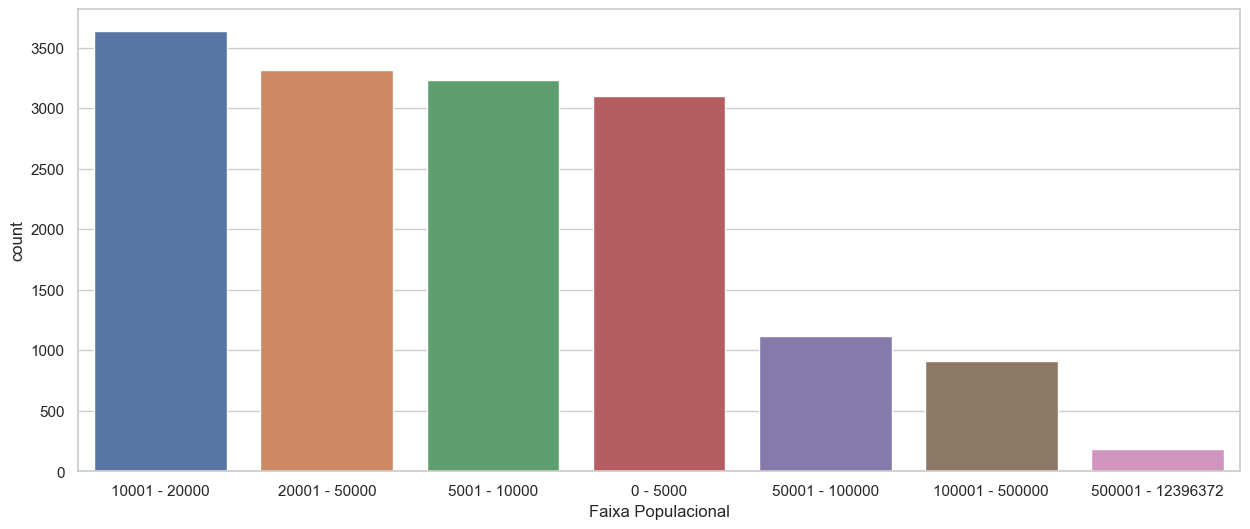

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Faixa Populacional', data=geral_mas, order=geral_mas['Faixa Populacional'].value_counts().index)


As cidades de maiores ocorrências de mulheres atuando em cargos públicos, possuem uma faixa populacional de até 5000 (3024 cidades) e o segundo maior grupo de cidades é de faixa populacional de 10001 até 20000, totalizando 2907 cidades. O terceiro maior grupo está em uma faixa populacional de 5001 até 10000, ou seja, 2680 cidades. O quarto grupo com grandes ocorrências é de faixa populacional entre 20001 até 50000, somando 2256 cidades.

No caso das cidades onde os homens estão atuando em cargos público, o maior grupo de faixa populacional é de 10001 até 20000     , 3636 cidades. O segundo maior grupo populacional está entre 20001 até 50000, totalizando 3318 cidades. Seguindo para o terceiro maior grupo, a faixa populacional é de 5001 até 10000, contando 3236 cidades. Também há um quarto grupo signigicativo, com faixa populacional de até 5000, resultando em 3104 cidades brasileiras.

#### E a idade desses gêneros? Possuem diferença significativa?

In [ ]:
# Valores únicos da coluna "Idade"
geral_fem['Idade'].unique()

array([33, 57, 28, 43, 52, 41, 39, 42, 58, 48, 44, 36, 49, 56, 45, 51, 32,
       72, 35, 55, 67, 61, 34, 47, 53, 38, 54, 29, 50, 59, 46, 63, 62, 40,
       37, 68, 69, 60, 64, 31, 66, 21, 79, 70, 75, 30, 23, 82, 73,
       'Nao informou', 71, 76, 65, 24, 74, 26, 27, 80, 22, 77, 25, 20, 78,
       19], dtype=object)

In [ ]:
# Substituindo "Nao informou" por NaN 
geral_fem['Idade'].replace('Nao informou', pd.NA, inplace=True)

# Excluindo as linhas onde a coluna "Idade "é NaN
geral_fem.dropna(subset=['Idade'], inplace=True)

In [ ]:
# Transformando as variáveis de object para int
geral_fem['Idade'] = geral_fem['Idade'].astype(int)

<Axes: >

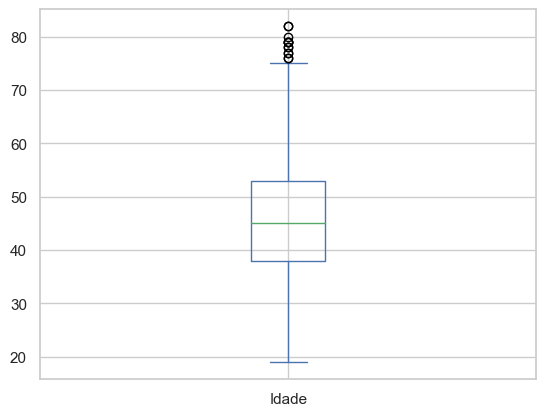

In [ ]:
geral_fem['Idade'].plot.box()

In [ ]:
# Valores únicos da coluna "Idade"
geral_mas['Idade'].unique()

array([40, 50, 35, 56, 36, 41, 55, 29, 52, 46, 51, 53, 45, 54, 44, 48, 47,
       58, 57, 34, 49, 42, 65, 66, 73, 37, 38, 68, 59, 26, 63, 43, 27, 62,
       64, 75, 39, 69, 60, 30, 78, 'Nao informou', 32, 70, 72, 28, 22, 31,
       33, 61, 71, 79, 77, 67, 23, 84, 24, 25, 74, 81, 76, 21, 82, 83, 87,
       95, 89, 80, 20, 19, 86], dtype=object)

In [ ]:
# Substituindo "Nao informou" por NaN 
geral_mas['Idade'].replace('Nao informou', pd.NA, inplace=True)

# Excluindo as linhas onde a coluna "Idade "é NaN
geral_mas.dropna(subset=['Idade'], inplace=True)

In [ ]:
# Transformando as variáveis de object para int
geral_mas['Idade'] = geral_mas['Idade'].astype(int)

<Axes: >

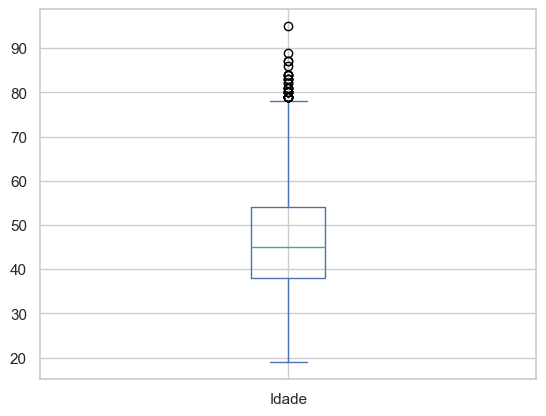

In [ ]:
geral_mas['Idade'].plot.box()

Para os 2 gêneros a realidade é bastante próxima. A média de idade está entre 40 a 50 anos. Mas é possível afirmar que idades acima de 70 anos são outliers.

# Conclusões

A análise revela que:

- A representação de mulheres em cargos públicos municipais é menor em áreas como prefeitura e esportes.
- O estado de Minas Gerais tem presença predominante em diversos setores.
- A faixa populacional das cidades com mais mulheres em cargos públicos varia, mas é geralmente menor do que aquelas com mais homens.

Esses dados indicam que ainda existe uma disparidade de gênero em muitas áreas dos órgãos públicos municipais, com as mulheres frequentemente representando uma minoria. No entanto, também é possível observar uma tendência de maior presença feminina em áreas como educação e saúde. 